# Reducing Commercial Aviation Fatalities

<h1>1.Business/Real-world Problem</h1>

<h2> 1.1. Problem Statement </h2>

<p>

We all Know that Aviation is the Key Industry to Globalization.It Constitutes nearly 30% of Share in Transportation only in India every year. Besides this, a lot of Aviation Fatalities are taking place every year. Nearly, total fatalities due to aviation accidents since 1970 is 83,772 across the world. There are many reasons like Pilot error, Mechanical failure, Design defect, Air traffic failure, Defective runways. But here our main focus is on  aviation accidents caused by pilot error, and solutions to avoid them so that accidents in aviation industry can be reduced results in saving of lives of people and money to airlines

know more about them: 

1. https://en.wikipedia.org/wiki/Aviation_accidents_and_incidents#:~:text=The%20total%20fatalities%20due%20to,226%20as%20recently%20as%201998.

 2.- https://www.statista.com/statistics/1043639/india-fsc-market-share/

</p>

<h2>1.2 Source/Useful Links </h2>

Booz Allen Hamilton is a consulting firm with expertise in analytics, digital, engineering, and cyber, businesses, government, and military organizations has conducted this kaggle competition. This firm trying to understand the state of awareness of a pilot in an aeroplane so that they can predict if a pilot is heading into trouble or not. Most of the flight related fatalities step from loss of “ aeroplane state awareness”. That is, an ineffective attention management on the part of pilots who may be distracted, sleepy or in other dangerous cognitive states. 

<br>
This dataset provided by  Booz Allen Hamilton contains about 4 different cognitive states

<p>
<b> Source: </b> https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/overview
</p>

<h2>1.3. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Mapping the real-world problem to an ML problem</h2>

- we want to Predict the probability of pilot being under each one of the 4 events, so that we can alert the pilot to take necessary preventive Steps..

- It is a Multi-Class Classification problem.
There are 4 events which we are supposed to predict namely — A(Baseline), B(SS), C(CA), D(DA).

<h3>2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/overview/evaluation

- Metrics: 

      Multi-Class logloss

      Confusion matrix 

**Why These Metrics Only**

 - Here, we are predicting the state of mind of the pilots and we are pridicting what is the probablity that the pilot is Falling into any of the states. In the process of predicting our model should not falsely predict that the pilot in Normal state while pilot is actually in some Dangerous State. Here we need to take care of these misclassifications and we need to penalize even every small error in probability that we make.So for this Situation Multi-class Log-loss as a metric Makes Sense.
 
 - And we should have High recall rate as the cost of Missclassifcation is High because it is like Life and Death Matter.



<h2>2.3. Useful blogs, videos and reference papers</h2>

- Introduction to physiological data: https://www.kaggle.com/stuartbman/introduction-to-physiological-data

- Biosppy: https://biosppy.readthedocs.io/en/stable/biosppy.html

-  https://atharvamusale.medium.com/reducing-commercial-aviation-fatalities-c335757e8d01


# Exploratory Data Analysis

In [1]:
# Library for Parallel Computing:  https://www.infoworld.com/article/3542595/6-python-libraries-for-parallel-processing.html

!pip install dask[dataframe]

In [2]:
#https://biosppy.readthedocs.io/en/stable/#:~:text=BioSPPy%20is%20a%20toolbox%20for,torwards%20the%20analysis%20of%20biosignals.

!pip install biosppy

In [3]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import warnings 
import zipfile
import tqdm
import dask
import dask.dataframe as dd
 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings('ignore')

### Extracting Data From Kaggle

- This Video Helps a Lot: https://www.youtube.com/watch?v=BPUfVq7RaY8&t=8s

#### Downloading Train

In [4]:
#Extracting Data Through Culwget
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615609701&Signature=gqn2TJud5zyGDnwKhUo201Vx9qeEcYEP8REgs1YmovZA56nIPg5G%2FwPa2IHrepSyqBTcThqr%2B%2BnDYVCkm58%2BpMzMQw4sWok9BhqfuasBkF6VIuEzjW5VAHjL1w6GkMx3DfGPyVTSXj%2BtGrBBOiJykuhXgkzZCXtoPVxUwDq9iFPRxrEwyB5n7tLiR%2B06qwCgEKMYR8dYOcngWGzATnFrDNucxMU%2BJJI1hIZMVvGDqFEYO1w1K%2BdWx%2FCHjUNujarwmmMyYD%2BWkKU5B9NNg67kqJsLOU1btmwZ35VzDGx1npjSr7UF73lJP6DU%2B405hAny471c%2FGyHTWCkOHqP34cQBg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'

--2021-03-10 04:28:36--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615609701&Signature=gqn2TJud5zyGDnwKhUo201Vx9qeEcYEP8REgs1YmovZA56nIPg5G%2FwPa2IHrepSyqBTcThqr%2B%2BnDYVCkm58%2BpMzMQw4sWok9BhqfuasBkF6VIuEzjW5VAHjL1w6GkMx3DfGPyVTSXj%2BtGrBBOiJykuhXgkzZCXtoPVxUwDq9iFPRxrEwyB5n7tLiR%2B06qwCgEKMYR8dYOcngWGzATnFrDNucxMU%2BJJI1hIZMVvGDqFEYO1w1K%2BdWx%2FCHjUNujarwmmMyYD%2BWkKU5B9NNg67kqJsLOU1btmwZ35VzDGx1npjSr7UF73lJP6DU%2B405hAny471c%2FGyHTWCkOHqP34cQBg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456337398 (435M) [application/zip]
Saving to: ‘train.csv.zip’

train.csv

#### Downloading Test

In [50]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615614158&Signature=bWWNqpDZ3ZidF4vKVn%2BWQWxWP80NzMuM4iQpHL7pT%2FbZ4P3fbf3PGrhY4%2BJH99T568WZ94I88%2FnSoKjSyZjTbmlaorRq%2FdRx1yYOPfi7B8dWGhB5oKYdofUB538gw%2BJmsCouRBVkG%2Byr6hQCIRkEel%2Ftyb3surbWbNqlD2COkaLr6STs%2BQ33ksK676gg6rrX9Jua8AwvkxGOIOiHBtjPvbg8DeMWys6hQGT%2BXnO25lac5gWD24Iiin5wUgS4tAsUOgnLp2JqY08zQEDkQ7S6URa18beeBiPCafp90KvG%2BO%2BOEU2a26NYWVJ2s0D7XtlkT9nxxBbKpTRu6omid5WTBg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip" -c -O 'test.csv.zip'

--2021-03-10 05:43:01--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615614158&Signature=bWWNqpDZ3ZidF4vKVn%2BWQWxWP80NzMuM4iQpHL7pT%2FbZ4P3fbf3PGrhY4%2BJH99T568WZ94I88%2FnSoKjSyZjTbmlaorRq%2FdRx1yYOPfi7B8dWGhB5oKYdofUB538gw%2BJmsCouRBVkG%2Byr6hQCIRkEel%2Ftyb3surbWbNqlD2COkaLr6STs%2BQ33ksK676gg6rrX9Jua8AwvkxGOIOiHBtjPvbg8DeMWys6hQGT%2BXnO25lac5gWD24Iiin5wUgS4tAsUOgnLp2JqY08zQEDkQ7S6URa18beeBiPCafp90KvG%2BO%2BOEU2a26NYWVJ2s0D7XtlkT9nxxBbKpTRu6omid5WTBg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1791131386 (1.7G) [application/zip]
Saving to: ‘test.csv.zip’

test.csv.zi

In [51]:
#How to unizip folder: https://stackoverflow.com/questions/50714467/extract-zip-files-using-python

def unzip_folder(zip_folder, destination):
        """
        Args:
            zip_folder (string): zip folder to be unzipped
            destination (string): path of destination folder
            pwd(string): zip folder password

        """
        with zipfile.ZipFile(zip_folder) as zf:
            zf.extractall(
                destination)


#unzipping train 
source = 'train.csv.zip'
destination = ''
unzip_folder(source, destination)

#unzipping test
source = 'test.csv.zip'
destination = ''
unzip_folder(source, destination)

# reading the Files

In [52]:
# https://distributed.dask.org/en/latest/manage-computation.html
train_data1 = dd.read_csv("train.csv")
train_data1 = train_data1.compute()

print("number of rows in train are {} and columns are {}".format(train_data1.shape[0], train_data1.shape[1]))

number of rows in train are 4867421 and columns are 28


In [53]:
#Looking for the top 5 rows:
train_data1.head(5)

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [55]:
#Looking for the columns|features
train_data1.columns

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')

<h4> Features of the Dataset: </h4>

- <b>ID </b> - This is unique identifier present only in test and sample submission csv, which is used to identify each pilot.

- <b>Crew</b>- This is unique identifiers for pair of pilots. There are 9 pilots in the data.

- <b>Experiment</b>- Experiment the pilot has undergone. It may be CA,DA,SS or LOFT(Line of Flight not present in train.csv, present only in test data).

- <b>Time</b>- Seconds into the experiment

- <b>Seat</b>- Left(0) and Right(1)

- <b>EEG</b>- Electroencephalography (EEG) measures the electrical activity in the brain. An electrode is placed on the scalp which measures the electrical voltage resulting from ionic current. So all the 20 EEG features which are present in the dataset are the voltages generated at different sensors placed on different parts of the scalp.

- <b>ECG</b> - Electrocardiogram measures the electrical activity in the heart. It is measured in microvoltage. The sensor for this experiment had a resolution/bit of .012215 μV and a range of -100 mV to +100 mV. The data are provided in microvolts.

- <b>Respiration</b> - This measures the rise and fall in the level of the chest. The sensor had a resolution/bit of .2384186 μV and a range of -2.0V to +2.0V.
- <b>Galvanic Skin Response</b> - This measures the electrodermal activity which reflects sweat gland activity that are reflective of intensity of emotional stress. The sensor had a resolution/bit of .2384186 μV and a range of -2.0V to +2.0V.The data are provided in microvolts.

- <b>Event</b> - This indicates the state of pilot at a particular time.It can be A=Baseline, B=SS, C=CA, D=DA

In [56]:
#Checking all the unique values in the Crew, experiment, seat, event
features_lst = ['crew', 'experiment', 'seat', 'event']

for feature in features_lst:
  unique_values = train_data1[feature].unique()
  print("Unique values in {} are {}".format(feature, unique_values))


Unique values in crew are [ 1  2  3  4  5  6  7  8 13]
Unique values in experiment are ['CA' 'DA' 'SS']
Unique values in seat are [1 0]
Unique values in event are ['A' 'C' 'D' 'B']


- Here you can see that 9 unique values present in crew feature means 9 pilots.
- There are 3 different types of experiments are conducted 

        Channelized Attention (CA) - This State Will Occur When Pilot is not able to Do MultiTasking and Only Focus on One Thing without Caring about what happening in the surrounding environment

        Diverted Attention(DA) - In Simple Terms, It like noticing or thinking about something instead of Focusing on the real task..It can thought as multitasking but attention is given to various unnecessary Tasks

        Startle/Surprise(SS) - his state can Defined as the Suprise or Sudden Change in scenario where the Attention gets Disrupted Abruptly..

- There present 4 types of events: 
        A = Baseline
        B = SS Startle/Surprise
        C = CA Channelized Attention 
        D = DA Diverted Attention

In [58]:
# https://miamioh.instructure.com/courses/38817/pages/data-cleaning#:~:text=The%20function%20dataframe.-,isnull().,
# values%20in%20the%20data%20set.&text=A%20simple%20way%20to%20deal,missing%20values%20in%20the%20dataset.

#Checking for null values in the dataset

train_data1.isnull().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

- From the above data, we can say that there are no missing values so we can exclude mean/median/mode imputations methods here

In [59]:
#Checking the datatype of each variables

train_data1.dtypes

crew            int64
experiment     object
time          float64
seat            int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event          object
dtype: object

- This Say that most of them are numbers except seat, event and experiment, as Machine Learning Model mostly understand only numbers It's good to encode them while passing through models

Number of data points in class A : 2848809 ( 58.528 %)
Number of data points in class C : 1652686 ( 33.954 %)
Number of data points in class D : 235329 ( 4.835 %)
Number of data points in class B : 130597 ( 2.683 %)


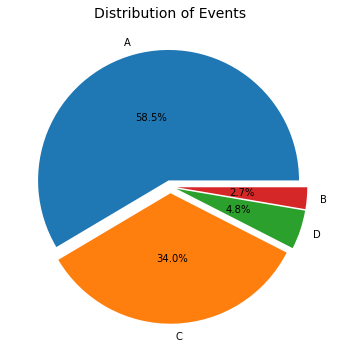

In [62]:
#Used this Site: https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/


#Checking the proportions of Values present in TargetVaribale event

#getting all unique values
unique_event = train_data1['event'].unique()
# print(unique_event)

#getting the proposition for each event
event_proposition = []
for event in unique_event:
  proposition = len(train_data1[train_data1['event'] == event]) / len(train_data1['event'])
  event_proposition.append(proposition)
# print(event_proposition)

#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = unique_event
plt.pie(x=event_proposition, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Distribution of Events", fontsize=14);


train_class_distribution = train_data1['event'].value_counts()
for i in train_class_distribution.keys():
    print('Number of data points in class', i, ':',train_class_distribution[i], '(', np.round((train_class_distribution[i]/train_data1.shape[0]*100), 3), '%)')


- <b>Conclusions:</b> 
    
    1. Pie plot is about the distribution of events and the proposition they covered out of 100 percent.

    2. From the Above plot we can clearly see that event A[Baseline] has 58.5% of total events[100%] and  occured most of The times..This depicts that Most of Time Pilot is Under the Control. The Second most event is CA occured 34% of times followed by DA with 4.8% and here SS is the rare event which can be justified beacause this occurs only when Sudden or Suprise things happens may be like heartattacks..

    3. This is Absolutely imbalanced data but imbalanced is <b>Justified</b> here..Let test the model performance with both  Imbalance and Balance..we use Techniques like SMOTE to balance the data..

[]

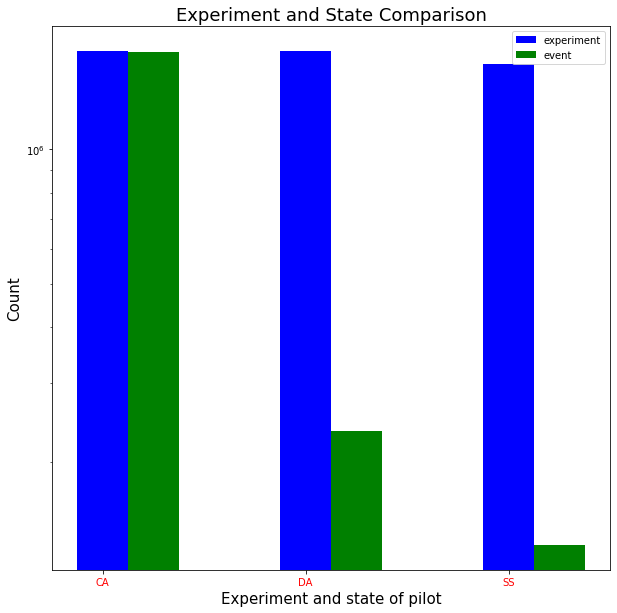

In [64]:
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec16/plotting-multiple-bar-charts

# #In this Function, we get to know how many times a partcular Experiment is Conducted and How many times we got the Actual result conducted

events = [('CA', 'C'), ('DA', 'D'), ('SS', 'B')]
exp_events = ['CA', 'DA', 'SS']

count_exp = []
count_event = []

for eve in events:
  count_exp.append(len(train_data1[train_data1['experiment'] == eve[0]]))
  count_event.append(len(train_data1[(train_data1['experiment'] == eve[0]) & (train_data1['event'] == eve[1])]))



plt.figure(figsize=(10, 10))
X = np.arange(3)
plt.bar(X + 0.00, count_exp, color = 'b', width = 0.25, label = 'experiment')
plt.bar(X + 0.25, count_event, color = 'g', width = 0.25, label = 'event')
plt.legend()


plt.title('Experiment and State Comparison', size = 18)
plt.xlabel("Experiment and state of pilot", fontsize=15) 
plt.ylabel("Count", fontsize=15) 
plt.yscale('log')

y_pos = np.arange(len(exp_events))
plt.xticks(y_pos, exp_events, color='red')
plt.yticks(color='black')

plt.plot()




  Labels    total  Happend
0     CA  1658376  1652686
1     DA  1658393   235329
2     SS  1550652   130597


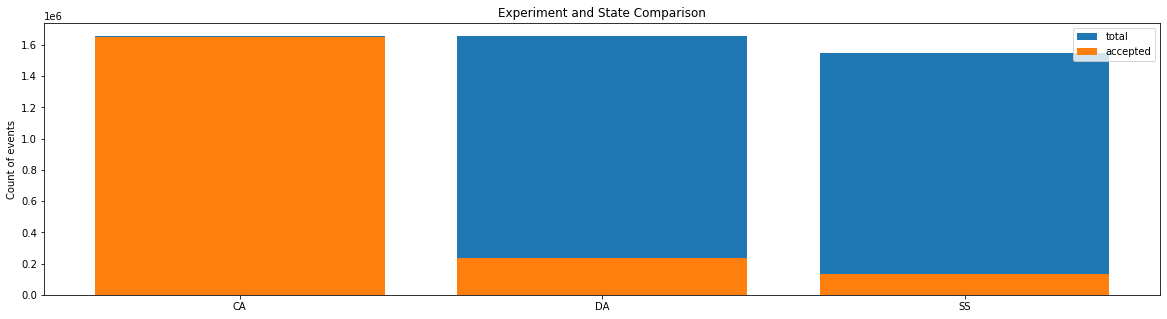

In [67]:
#Stack Bar plot
# #stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_s
#creating a Temporary Data Frame
temp = pd.DataFrame()
temp['Labels'] = exp_events
temp['total'] = count_exp
temp['Happend'] = count_event
print(temp.head(5))
print("="*50)
ind = np.arange(temp.shape[0])

plt.figure(figsize=(20,5))
p1 = plt.bar(ind, temp['total'].values)
p2 = plt.bar(ind, temp['Happend'].values)
plt.ylabel('Count of events')
plt.title('Experiment and State Comparison')
plt.xticks(ind, list(temp['Labels'].values))
plt.legend((p1[0], p2[0]), ('total', 'accepted'))

plt.show()

- <b>Conclusions:</b> 
    
    1. This is a Stacked Bar plot between Experiment and State of the pilot

    2. From the Above plots we can Clearly See that in SS experiment, only small number of times only SS State occured, So SS is rare in overall event also..

    3. When CA experiment is performed, most of the time CA state only Occured and DA State occured less number of time but more when compared with SS state..

### Seat

[]

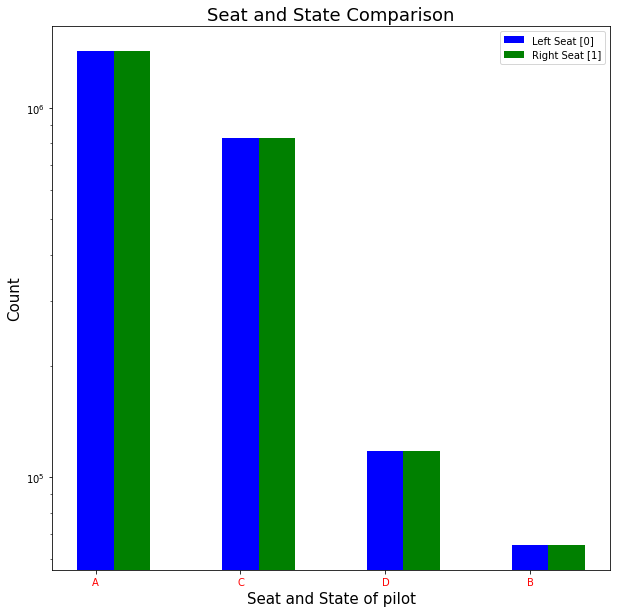

In [68]:
#In this Function, we get to know how events or state of the pilot are responding with respective to the Seat they have sat..

events = ['A', 'C', 'D', 'B']

count_seat0 = []
count_seat1 = []

for eve in events:

  subset_0 = train_data1[(train_data1['event'] == eve) & (train_data1['seat'] == 0)]
  subset_1 = train_data1[(train_data1['event'] == eve) & (train_data1['seat'] == 1)]

  count_seat0.append(len(subset_0))
  count_seat1.append(len(subset_1))



plt.figure(figsize=(10, 10))
X = np.arange(4)
plt.bar(X + 0.00, count_seat0, color = 'b', width = 0.25, label = 'Left Seat [0]')
plt.bar(X + 0.25, count_seat1, color = 'g', width = 0.25, label = 'Right Seat [1]')
plt.legend()


plt.title('Seat and State Comparison', size = 18)
plt.xlabel("Seat and State of pilot", fontsize=15) 
plt.ylabel("Count", fontsize=15) 
plt.yscale('log')

y_pos = np.arange(len(events))
plt.xticks(y_pos, events, color='red')
plt.yticks(color='black')

plt.plot()




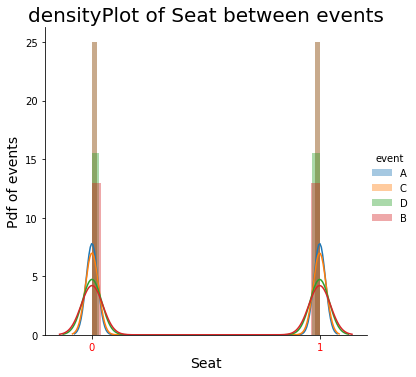

In [69]:
#distplot

seat = ['0', '1']
sns.FacetGrid(train_data1, hue="event", height=5).map(sns.distplot, "seat").add_legend();
plt.title('densityPlot of Seat between events', size = 20)
plt.xlabel('Seat', fontsize = 14)
plt.ylabel('Pdf of events', fontsize = 14)

y_pos = np.arange(2)
plt.xticks(y_pos, seat, color='red')
plt.yticks(color='black')


plt.show()

- <b>Conclusions:</b> 
    
    1. This is a Stacked Bar plot and density plot between Seat and State of the pilot

    2. From the Above plot It is clearly visible that there is no effect of position of Seat in the State of Pilot..
    
    3. The Distribution is present at 1 and 0 only and other than this there are no distributions present

    4. This probably has nothing to do with the outcome of the experiment though, we can remove at time of Feature Selection.


## Univariate Analysis and Bivariate Analysis

#### Galvanic Cell response

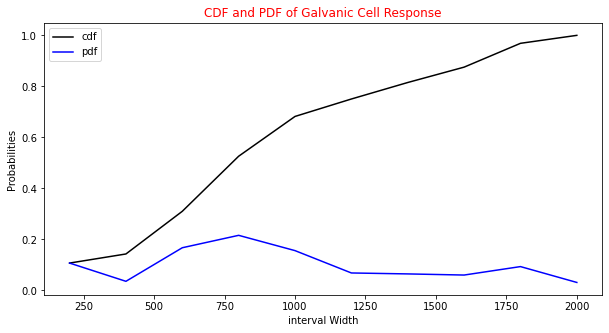

In [70]:
#Let's Do some Basic Analysis on gsr[galvanic cell Response]

counts, bins_edges = np.histogram(train_data1['gsr'], bins = 10)
#print(counts)
#print(bins_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))  
plt.title('CDF and PDF of Galvanic Cell Response', color = 'red')
plt.xlabel('interval Width')
plt.ylabel('Probabilities')

plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
plt.legend()

plt.show()


In [71]:
#Checking the precentiles of galvanic Cell Response
gsr_values = train_data1['gsr'].values
percentiles = [0, 25, 50, 75, 95, 99, 99.9, 100]
for i in percentiles:
    print(i,'percentile value is', np.percentile(gsr_values, i))

0 percentile value is 0.0
25 percentile value is 524.114014
50 percentile value is 770.197021
75 percentile value is 1197.119995
95 percentile value is 1743.52002
99 percentile value is 1899.670044
99.9 percentile value is 1948.050049
100 percentile value is 1999.859985


- <b>Conclusions:</b> 
    
    1. The Plot Depicts the pdf and cdf of <b>Galvanic Cell Response</b>

    2. The range of gsr is in between 0 to 1999.85 microvolts

    3. we can see that nearly 50% of data falls behind nearly 770 microvolts

    4.The Distribution is not noraml, It is Somewhat skewed to to the right.So when using logistic Regression and SVM, need to convert almost normally using log Transormation..

<b>Bivariate</b>

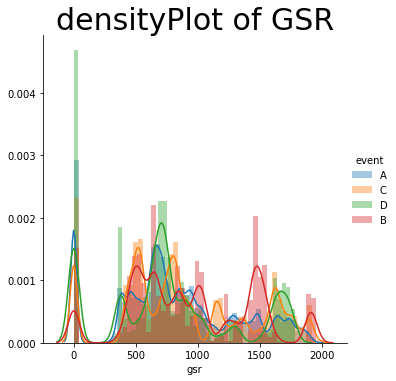

In [72]:
#distplot

sns.FacetGrid(train_data1, hue="event", height=5).map(sns.distplot, "gsr").add_legend();
plt.title('densityPlot of GSR', size = 30)

plt.show()

- From Above you can clearly see that
    1.There is more overlapping between the events, The distributions are almost the Same here
    2.This implies that we cannot  simply place any threshold on gsr to Seperate th..
    3.So, we can Say that This gsr feature add low value to classifing the events..

### Respiration

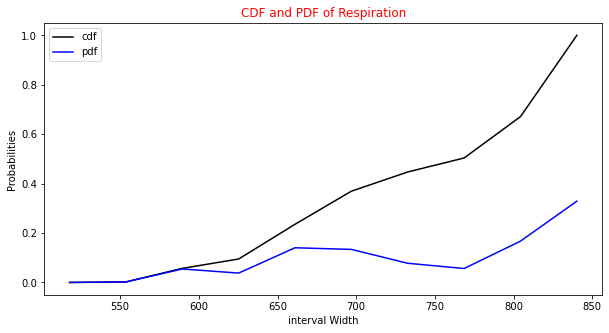

In [73]:
#Let's Do some Basic Analysis on gsr[galvanic cell Response]

counts, bins_edges = np.histogram(train_data1['r'], bins = 10)
#print(counts)
#print(bins_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))  
plt.title('CDF and PDF of Respiration', color = 'red')
plt.xlabel('interval Width')
plt.ylabel('Probabilities')

plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
plt.legend()

plt.show()


In [74]:
#Checking the precentiles of galvanic Cell Response
gsr_values = train_data1['r'].values
percentiles = [0, 25, 50, 75, 95, 99, 99.9, 100]
for i in percentiles:
    print(i,'percentile value is', np.percentile(gsr_values, i)) 

0 percentile value is 482.05999800000006
25 percentile value is 663.143005
50 percentile value is 743.437988
75 percentile value is 813.4119870000003
95 percentile value is 828.106018
99 percentile value is 830.7490230000003
99.9 percentile value is 832.812988
100 percentile value is 840.1840210000001


- <b>Conclusions:</b> 
    
    1. The Plot Depicts the pdf and cdf of <b>Respiration</b>

    2. All values of respiration lies between 482.05 to 840.18.

    3. Nearly 50% of Data lies below 743.437988..

    4. we can see the Same Thing here, that the data is Skewed towards the right.

<b>Bivariate</b>

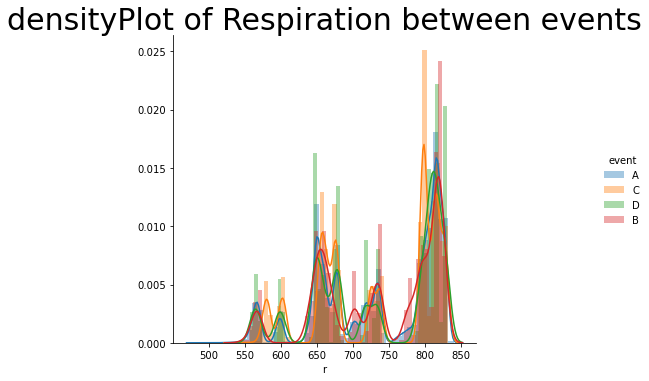

In [75]:
#distplot

sns.FacetGrid(train_data1, hue="event", height=5).map(sns.distplot, "r").add_legend();
plt.title('densityPlot of Respiration between events', size = 30)

plt.show()

- From Above you can clearly see that

     1. The More Overlapping between classLabels, It's difficult to Seperate.Same happening with respiration data..
     
     2. We cannot  simply place any threshold on respiration to Seperate the class Labels..
    
     3. respiration signal adds low value to the classification..

### ECG

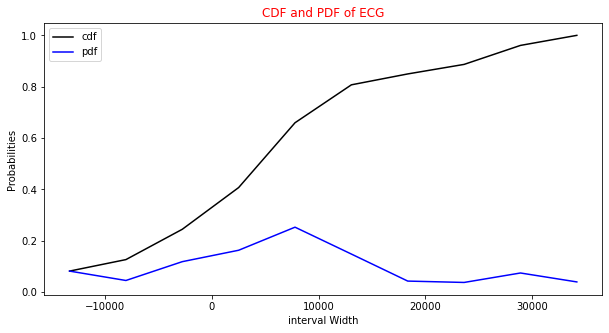

In [76]:
#Let's Do some Basic Analysis on gsr[galvanic cell Response]

counts, bins_edges = np.histogram(train_data1['ecg'], bins = 10)
#print(counts)
#print(bins_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))  
plt.title('CDF and PDF of ECG', color = 'red')
plt.xlabel('interval Width')
plt.ylabel('Probabilities')

plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
plt.legend()

plt.show()


In [77]:
#Checking the precentiles of galvanic Cell Response
gsr_values = train_data1['ecg'].values
percentiles = [0, 25, 50, 75, 95, 99, 99.9, 100]
for i in percentiles:
    print(i,'percentile value is', np.percentile(gsr_values, i)) 

0 percentile value is -18585.69922
25 percentile value is -2550.070068
50 percentile value is 5920.509765999999
75 percentile value is 10290.099609
95 percentile value is 28519.800781
99 percentile value is 33208.101563
99.9 percentile value is 33526.300781
100 percentile value is 34188.300781


- <b>Conclusions</b>

   1.All Values of ecg are present between 18585.69 and 34188.
   2.50% of values are below 5920.50.
   3.The most Important Takeaway from this is ECG distribution somewhat looks Noramal Distribution

<b>Bivariate</b>

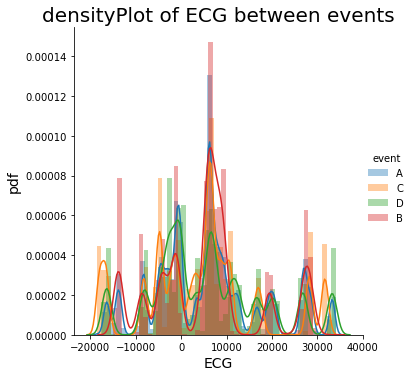

In [78]:
#distplot

sns.FacetGrid(train_data1, hue="event", height=5).map(sns.distplot, "ecg").add_legend();

plt.title('densityPlot of ECG between events', size = 20)
plt.xlabel('ECG', fontsize = 14)
plt.ylabel('pdf', fontsize = 14)
plt.show()

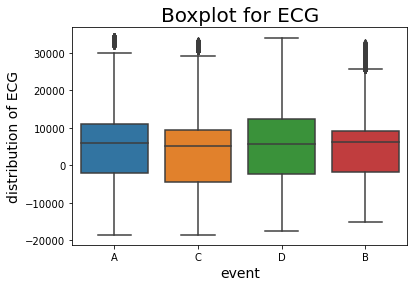

In [79]:
#Let's also analyze with boxplot 

sns.boxplot(x="event", y="ecg", data=train_data1)
plt.title('Boxplot for ECG', size = 20)
plt.xlabel('event', fontsize = 14)
plt.ylabel('distribution of ECG', fontsize = 14)


plt.show()

- <b>Conclusions:</b> 
    
    1. These Plot Depicts the density and boxplots of ECG with respective to events

    2. Here we can See that there is Somewhat difference between the events in ECG Distribution.

    3. DA is the one having more highest values and CA containing lowest values.

    4. There Seems to be some outliers present here, but we have to really check whether they are outliers or rare cases

### Electroencephalography 

In [80]:
#Taking all the features of EEG into seperate list 
all_features = train_data1.columns  #This will give all columns in the DataSet
eeg_features = []

for feature in all_features:
  if feature[0: 2] == 'ee':
    eeg_features.append(feature)
print(eeg_features)

['eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2']


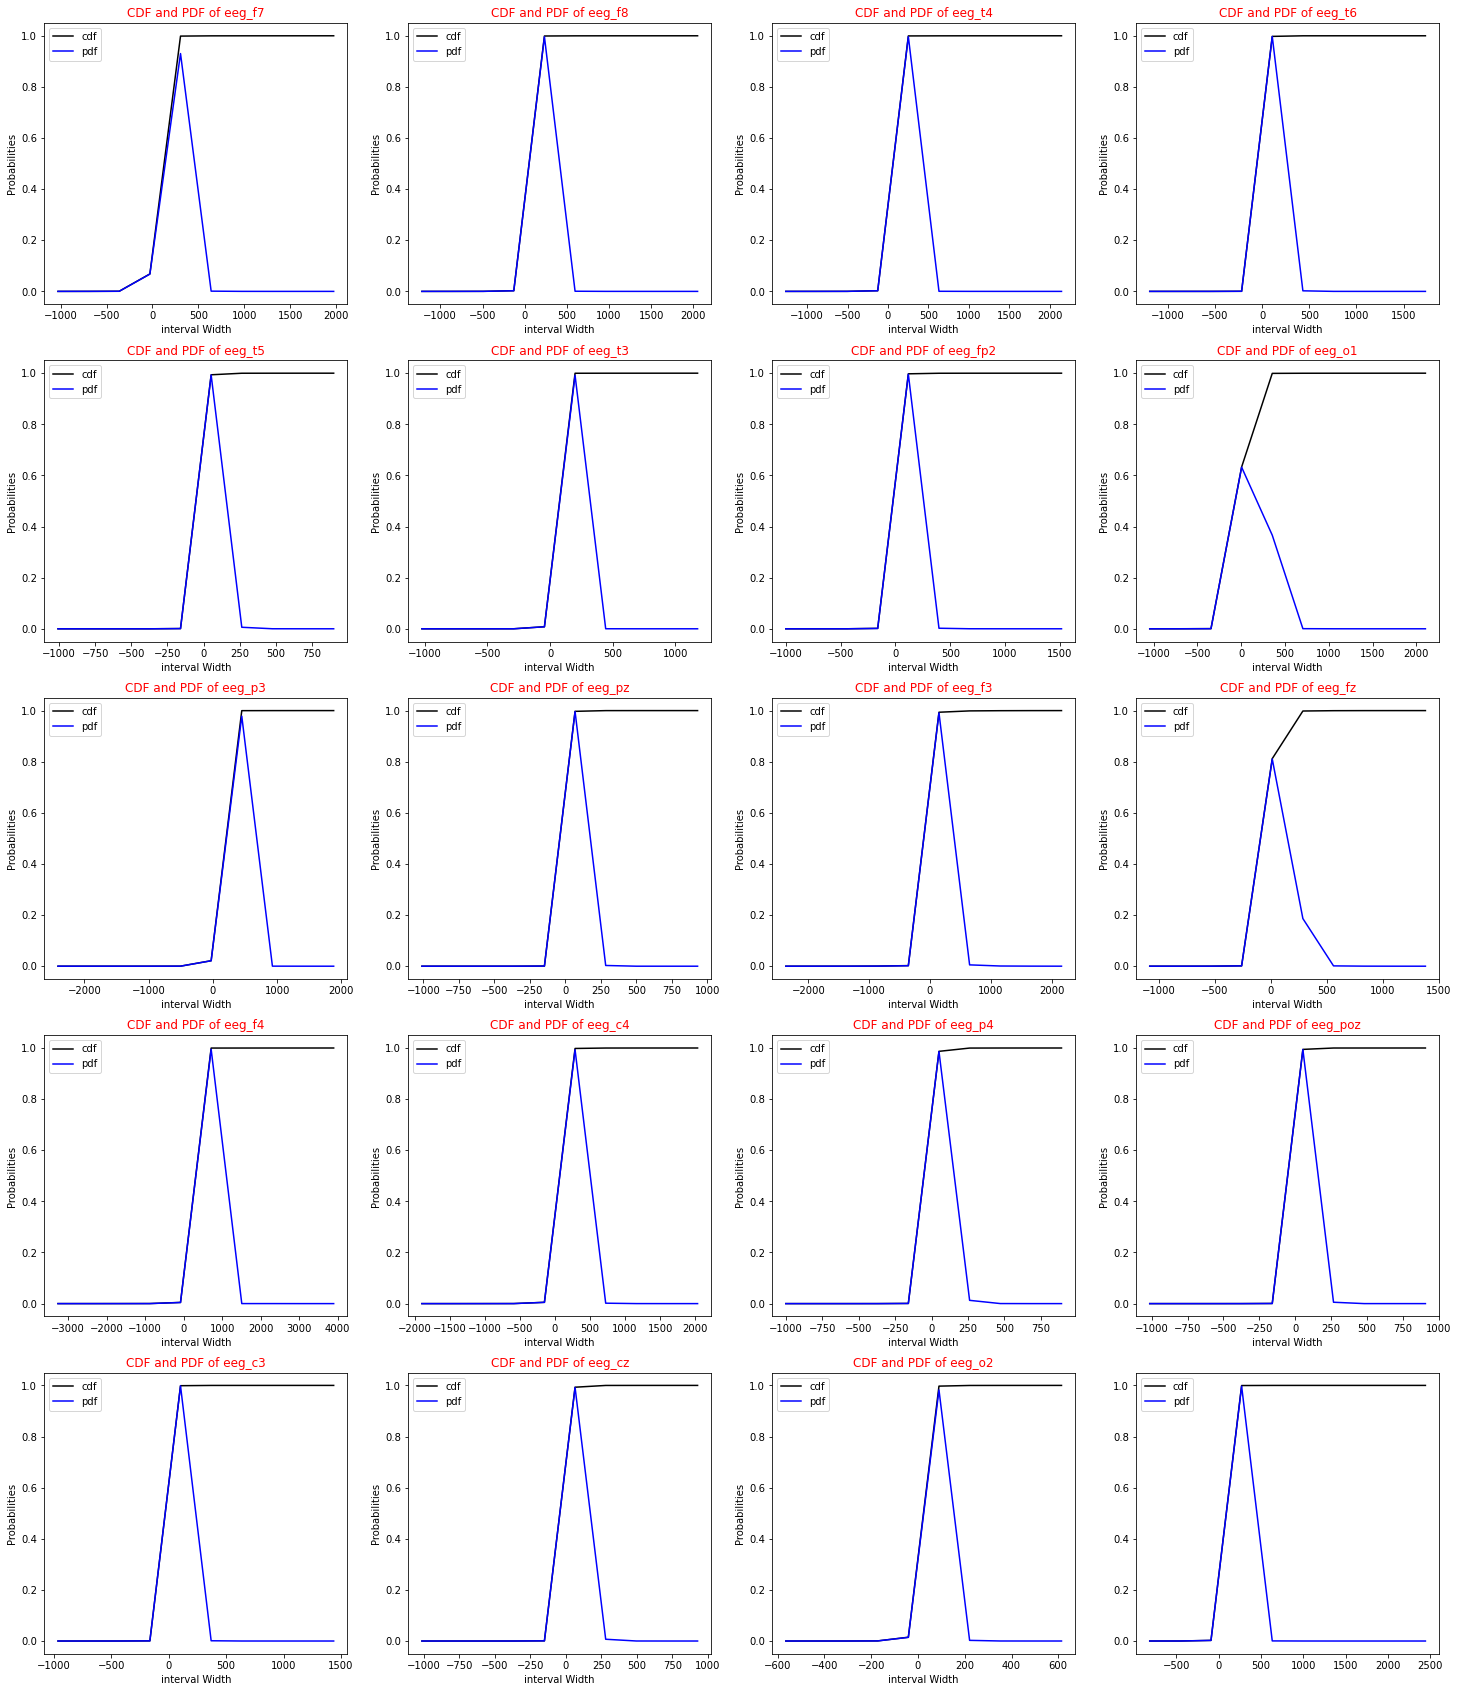

In [81]:
#plotting the pdf of each feature

plt.figure(figsize=(25,30))
j = 1

for eeg_feat in eeg_features:

  counts, bins_edges = np.histogram(train_data1[eeg_feat], bins = 10)
  #print(counts)
  #print(bins_edges)

  pdf = counts/sum(counts)
  cdf = np.cumsum(pdf)

  plt.title('CDF and PDF of {}'.format(eeg_feat), color = 'red')
  plt.xlabel('interval Width')
  plt.ylabel('Probabilities')

  
  plt.subplot(5, 4, j)
  plt.plot(bins_edges[1:], cdf, label = 'cdf', color = 'black')
  plt.plot(bins_edges[1:],pdf, label = 'pdf', color = 'blue' )
  plt.legend()

  j += 1

plt.show()


- <b>Conclusions:</b> 
    
    1. These Plots Depict the pdf and Cdf of <b>EEG Features.</b>

    2. we can see that most of eeg features are around and having mean as zero and looking like a normally distributed..

    3. Most of the feature variance are Flactuating between 500



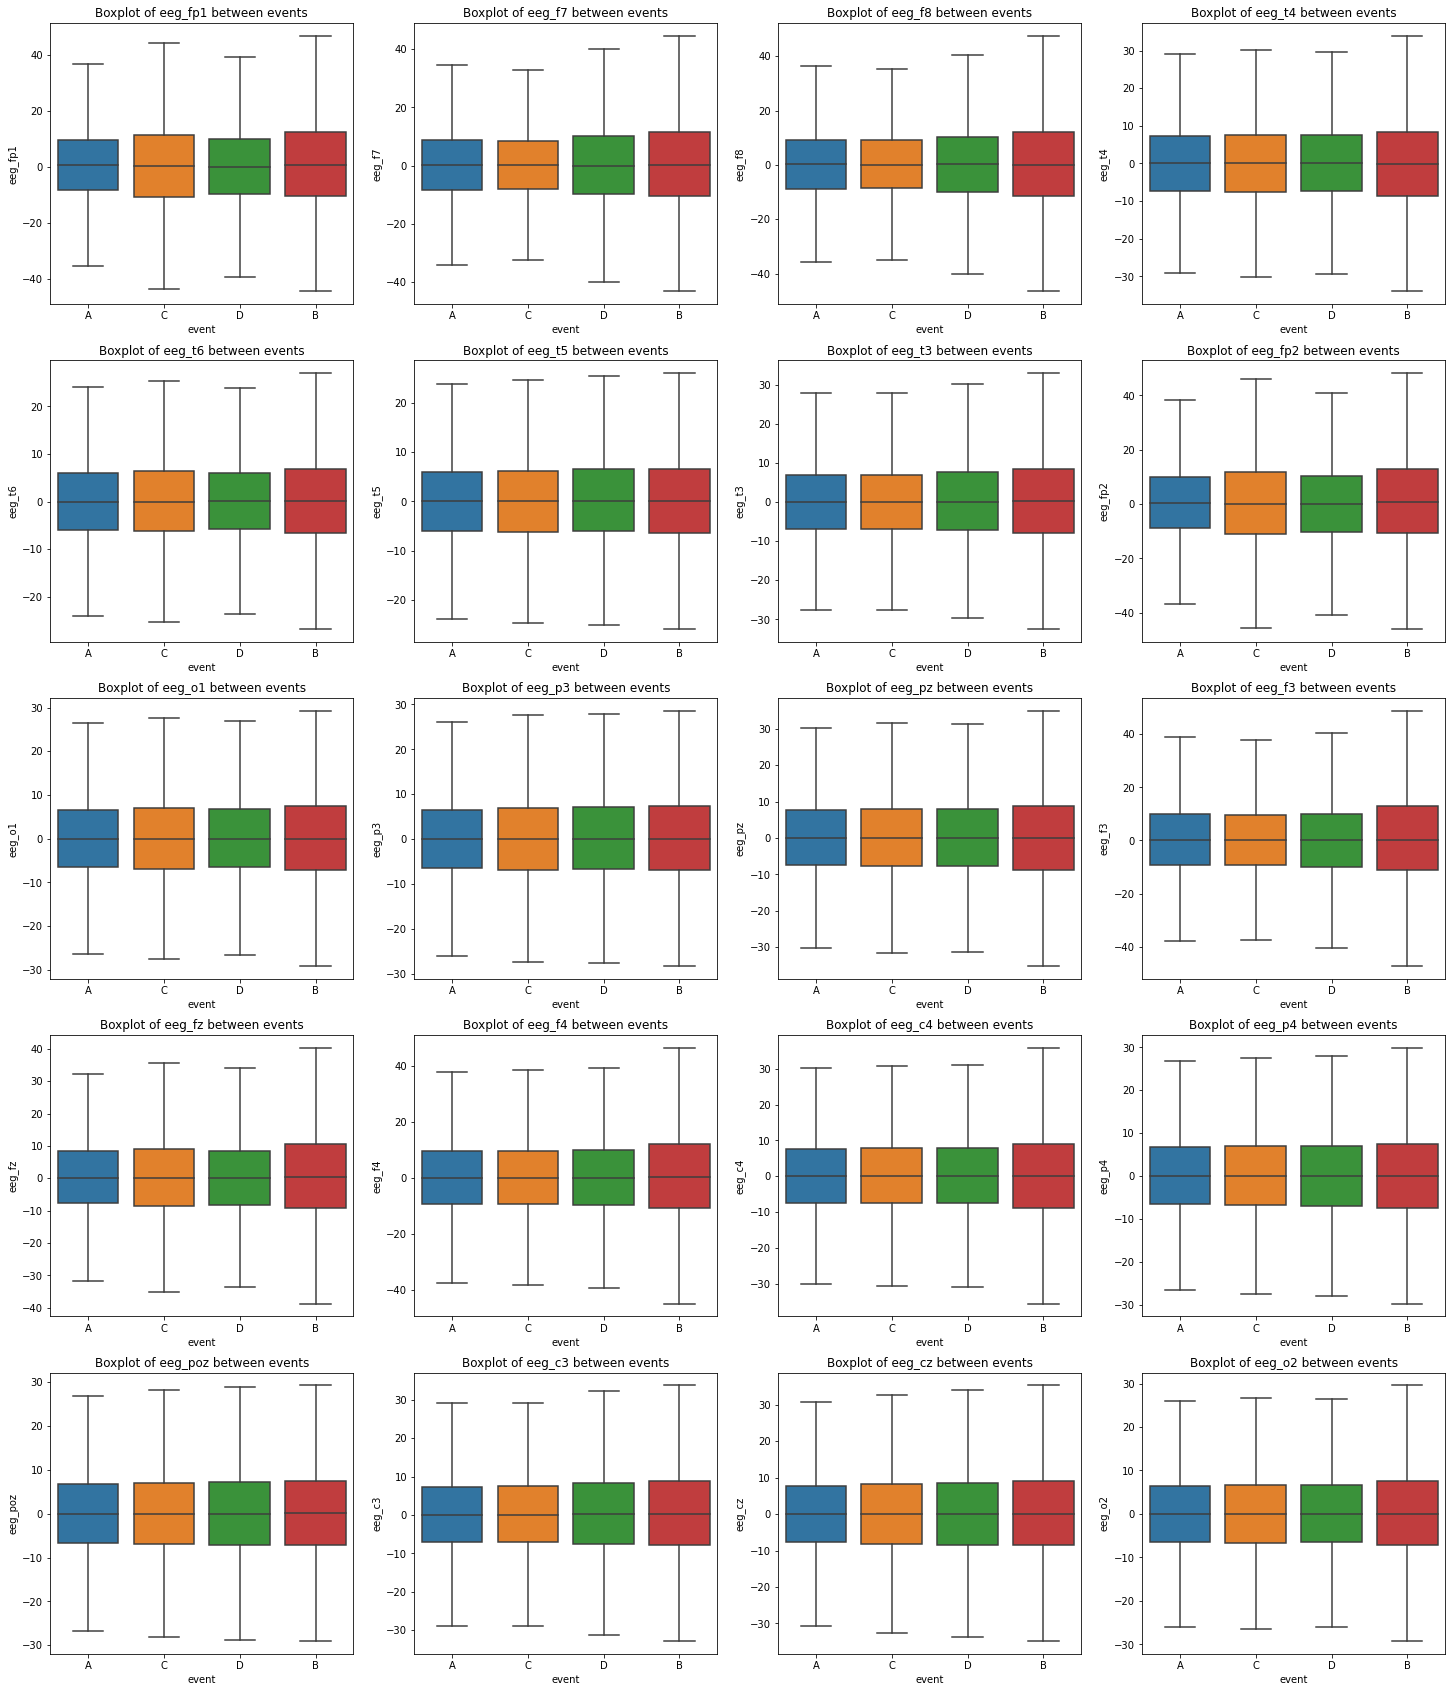

In [82]:
#Let's also analyze with boxplot 

plt.figure(figsize=(25,30))
j = 1

for eeg_feat in eeg_features:

  plt.subplot(5, 4, j)
  sns.boxplot(x="event", y=eeg_feat, data=train_data1, showfliers=False)
  plt.title('Boxplot of {} between events'.format(eeg_feat))

  j += 1

plt.show()


          
- <b>Conclusions:</b> 
    
    1. These Plots Depict the boxplots of <b>EEG Features.</b>

    2. we can See that Most of the eeg-features are overlapping a lot,    
indicating that we cannot just put a threshold to seperate class labels..

    3. we can comeup with some intresting features like <b>potential difference</b> 
      of EEG and <b>Power Features</b> in Feature Engineering as discussed in the 
      above reference links





#### Now Let's examine the how ECG, Respiration and Gsr Features are Behaving with time..

#### Time

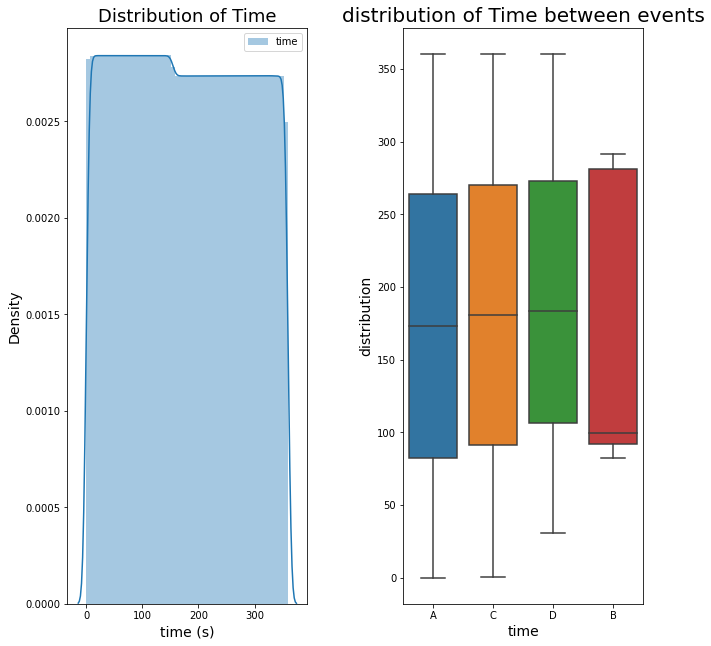

In [83]:
#distplot

#Let's See the Distribution of time

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
sns.distplot(train_data1['time'], label='time')
plt.legend()
plt.xlabel("time (s)", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.title("Distribution of Time", fontsize=18)

#Distribution of Time with respective to events
plt.subplot(1, 2, 2)
sns.boxplot(train_data1['event'], train_data1['time'])
plt.title('distribution of Time between events', size = 20)
plt.xlabel('time', fontsize = 14)
plt.ylabel('distribution', fontsize = 14)


# set the spacing between subplots 
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4,  hspace=0.4) 


plt.show()





          
- <b>Conclusions:</b>

    1. We can see that time in range between 0 to nearly 350 seconds.

    2. The Event B[SS] having high and Lower range of time when compared with A, C, D

    3. However, we cannot use time feature as an important feature because it is independent of the experiment and Time in Test is independent of time in train..



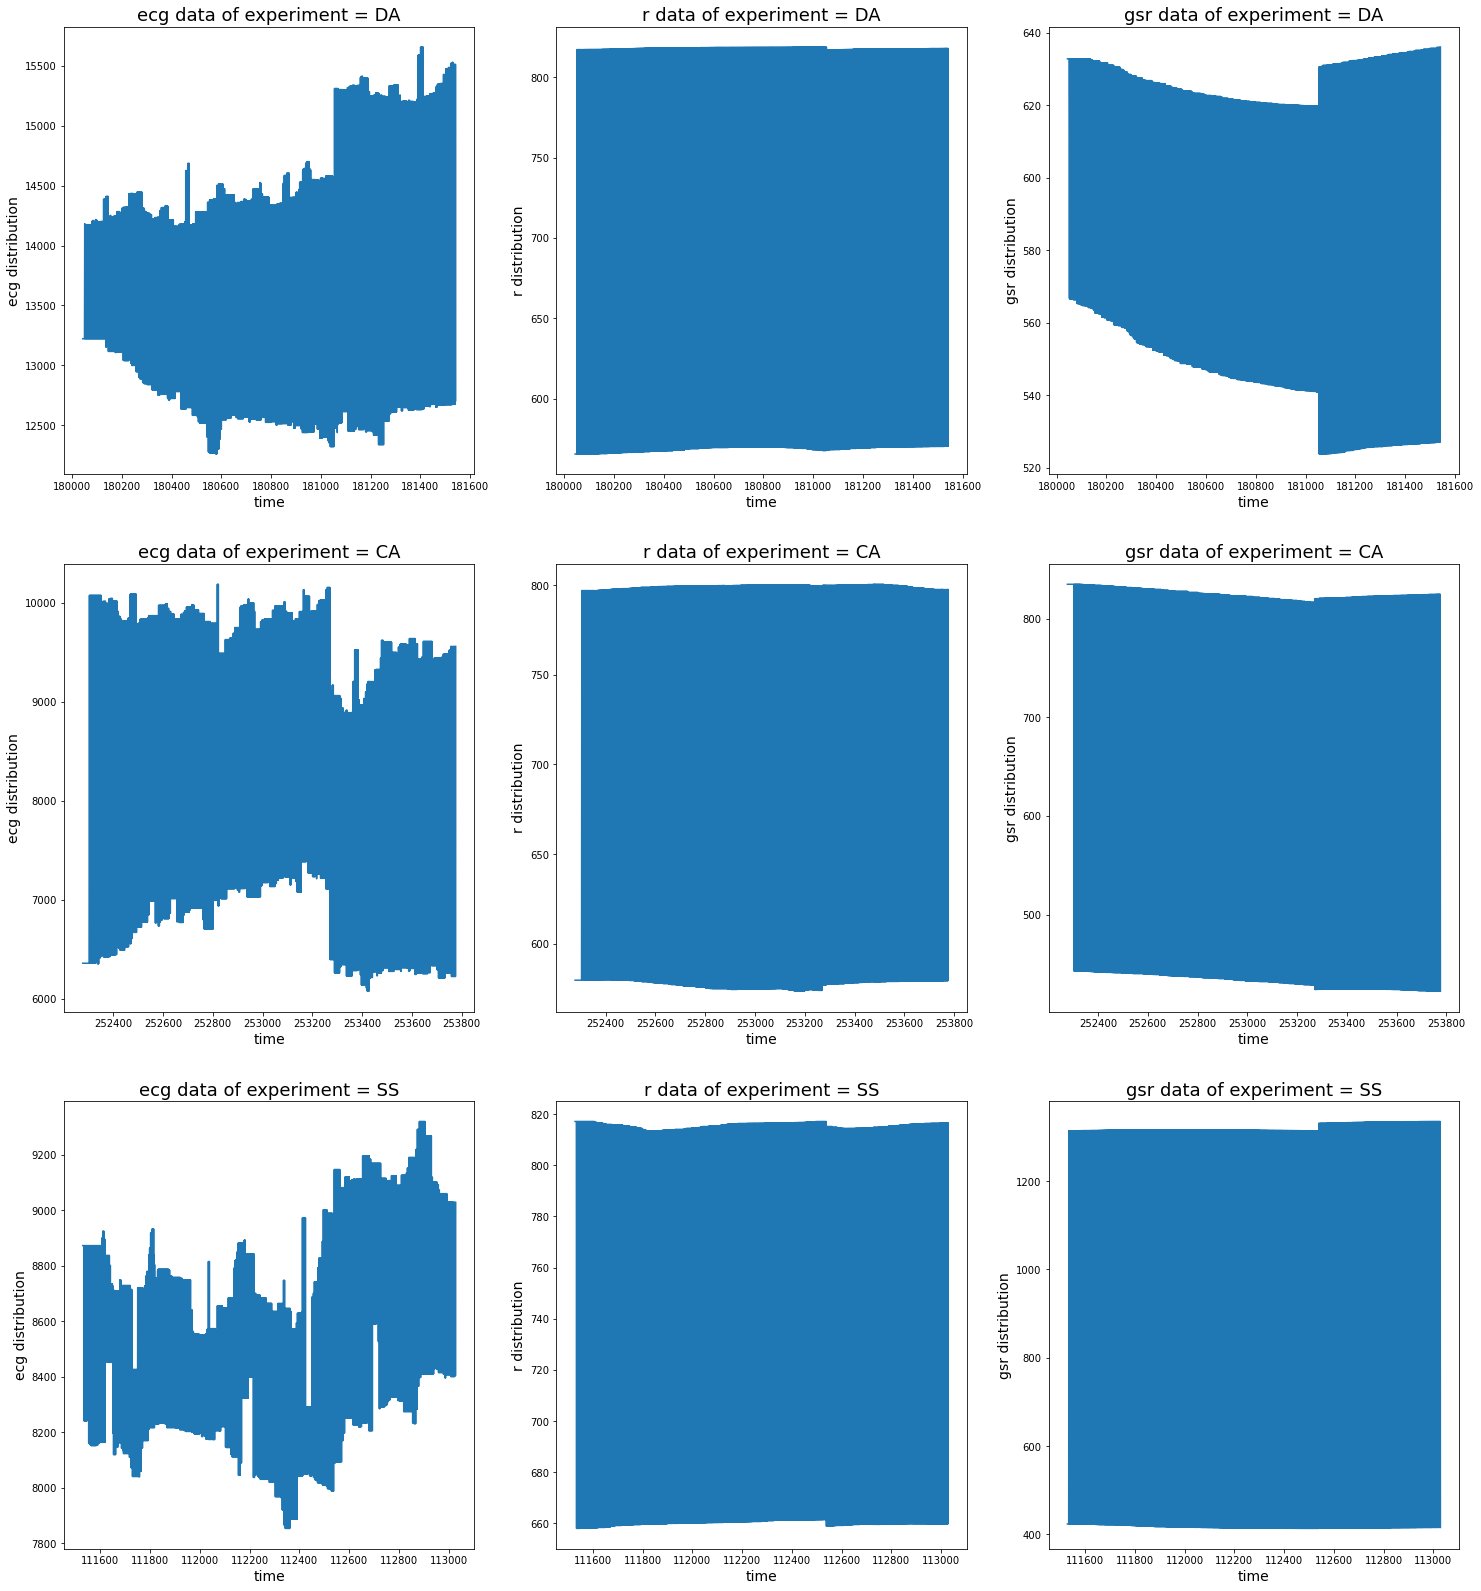

In [84]:
#Let's plot the ecg, respiration, gsr data for any one of the crew
import random

experiment = ['DA', 'CA', 'SS']
subset_features = ['ecg', 'r', 'gsr']

#Selecting pilot id Randomly
pilot_id = random.choice(train_data1['crew'].unique())

plt.figure(figsize = (25, 28))
j = 1

for exp in experiment: 
  for feat in subset_features:

    sub_data = train_data1[(train_data1['crew'] == pilot_id) & (train_data1['experiment'] == exp) ]
    sub_data.sort_values(by = 'time')

    plt.subplot(3, 3, j)
    plt.plot(sub_data[feat][: 1500])  #for 10 seconds
    plt.xlabel("time", fontsize = 14)
    plt.ylabel("{} distribution".format(feat), fontsize = 14)
    plt.title("{} data of experiment = {}".format(feat, exp), fontsize = 18)

    j += 1
  
plt.show()


          
- <b>Conclusions:</b>

    1. These plots represents the features[ECG, GSR, r]  data in different Experiments[CA, DA, SS].

    2. Here, in Case of ECG, For instance, There should be atleast 20 beats in 15 seconds and in respiration there shoul be atleast 3-4 breaths in nice sinusoidal Form..

    3. Here, we notice that all these features are highly noise and we should remove noise so that our models perform better.

    4. We shoul use Biosppy Package to remove noise in these Features 





#### Let's Try ScatterPlot

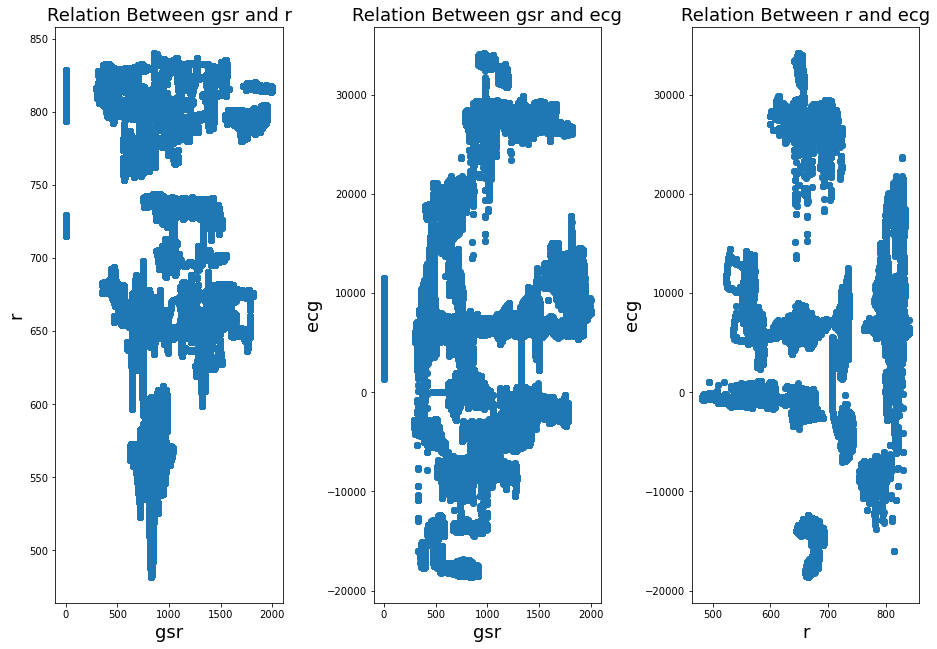

In [85]:
#Scatter plot

plt.figure(figsize = (15, 10))

#Let's See the relationship between GSR and Respiration

x = 'gsr'
y = 'r'
plt.subplot(1, 3, 1)
plt.scatter(train_data1[x], train_data1[y])
plt.xlabel("{}".format(x), fontsize = 18)
plt.ylabel("{}".format(y), fontsize = 18)
plt.title("Relation Between {} and {}".format(x, y), fontsize = 18) 

#Let's See the relationship between GSR and ecg  

x = 'gsr'
y = 'ecg'
plt.subplot(1, 3, 2)
plt.scatter(train_data1[x], train_data1[y])
plt.xlabel("{}".format(x), fontsize = 18)
plt.ylabel("{}".format(y), fontsize = 18)
plt.title("Relation Between {} and {}".format(x, y), fontsize = 18) 


#Let's See the relationship between Respiration and ecg
x = 'r'
y = 'ecg'
plt.subplot(1, 3, 3)
plt.scatter(train_data1[x], train_data1[y])
plt.xlabel("{}".format(x), fontsize = 18)
plt.ylabel("{}".format(y), fontsize = 18)
plt.title("Relation Between {} and {}".format(x, y), fontsize = 18) 


# set the spacing between subplots 
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4,  hspace=0.4) 


plt.show()

- Conclusions: 

    1. This plot depicts the Combined relationship between GSR, respiration, ECG.

    2. We can see that all these features are we weakly correlated and cannot 
able to get how much they are co-relating..

    3. We use approches like randomForest Feature Selection and Greedy approach to Select Best Features in Feature Selection Part


          

### Feature Engineering

#### Removing Noise in the Features

<b>Short notes on Noise: </b>

- 1. Biological sensors are quite susceptible to noise from outside sources. This can include lights (flickering at 50/60Hz depending on your AC frequency), and other electrical equipment. 

- 2. I think it's reasonable to assume that this experiment was in a chamber with a tonne of unshielded electronic high-tech stuff, all leaking noise at various frequencies. 

- 3. Hopefully this would be consistent between recordings, but it does make analysis more challenging, since removing any noise will usually remove a bit of signal too

- 4. reference: https://www.kaggle.com/stuartbman/introduction-to-physiological-data

##### ECG

In [86]:
from biosppy.signals import ecg, resp, eeg
import scipy.signal as signal

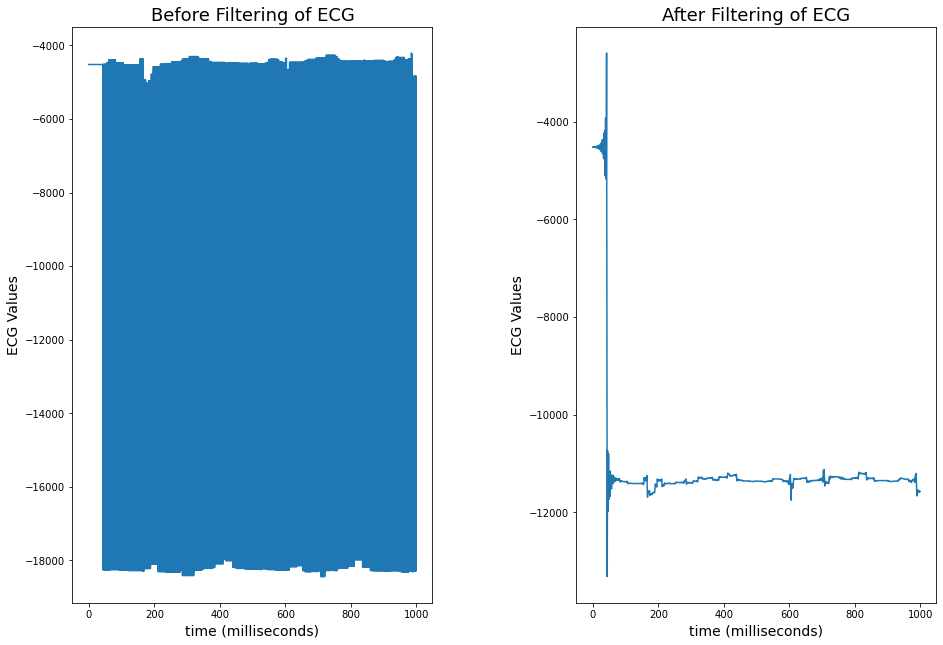

In [87]:
#referred this one to get max cutoff value: https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979

# train_data1 = train_data.copy()
train_data1.sort_values(["crew","time"],ascending=[True, True]).groupby("experiment")

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
b, a = signal.butter(8, 100, fs = 256)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html
filtered_ecg = signal.filtfilt(b, a, train_data1['ecg'], padlen=150)

train_data1['filtered_ecg'] = filtered_ecg


#Now Let's Check the Data After Filtering and Before Filtering

plt.figure(figsize = (15, 10))

plt.subplot(1, 2, 1)
subplot1 = train_data1[train_data1['experiment'] == 'CA']['ecg'][: 1000] #for 10 Seconds
plt.plot(subplot1)
plt.title('Before Filtering of ECG', fontsize = 18)
plt.xlabel('time (milliseconds)', fontsize = 14)
plt.ylabel('ECG Values', fontsize = 14)


plt.subplot(1, 2, 2)
subplot2 = train_data1[train_data1['experiment'] == 'CA']['filtered_ecg'][: 1000] #for 10 Seconds
plt.plot(subplot2)
plt.title('After Filtering of ECG', fontsize = 18)
plt.xlabel('time (milliseconds)', fontsize = 14)
plt.ylabel('ECG Values', fontsize = 14)



# set the spacing between subplots 
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4,  hspace=0.4) 
plt.show()

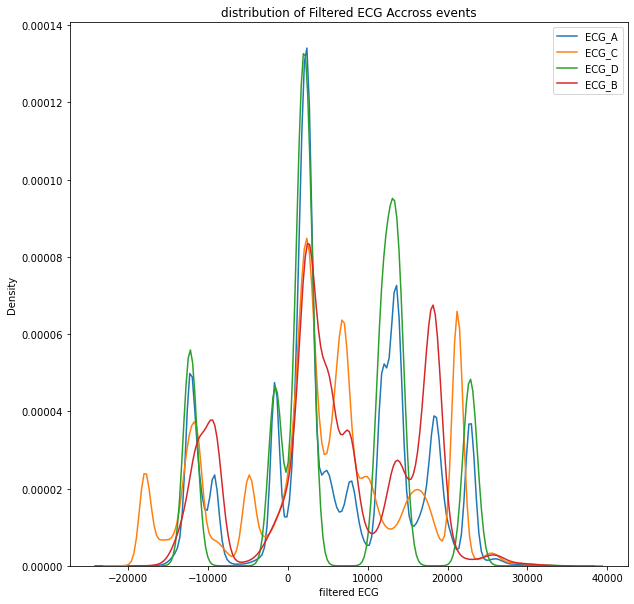

In [90]:
# Let's See How ECGrate is Behaving with Different Classes
plt.figure(figsize=(10,10))
#After Filtering ecg rate
sns.distplot(train_data1[train_data1['event'] == 'A']['filtered_ecg'], hist=False, label="ECG_A")
sns.distplot(train_data1[train_data1['event'] == 'C']['filtered_ecg'], hist=False, label="ECG_C")
sns.distplot(train_data1[train_data1['event'] == 'D']['filtered_ecg'], hist=False, label="ECG_D")
sns.distplot(train_data1[train_data1['event'] == 'B']['filtered_ecg'], hist=False, label="ECG_B")
plt.title('distribution of Filtered ECG Accross events')
plt.xlabel('filtered ECG')
plt.legend()
plt.show()

- Conclusions: 

  1. After Filtering, we can See that noise is removed in the ECG feature using moving average with the help of butter and flitflit methods in scipy Package.

  2. Now It make complete sense that in 10 seconds we can expect that many heart beats

  3. we should filter our data to get much more useful insights into it.
  
  4. we can Also that Instead of Raw ECG Data, Filtered ECG is somewhat making sense and not toomuch overlapping as previous and may add some value in predicting Event.


##### Respiration(r)

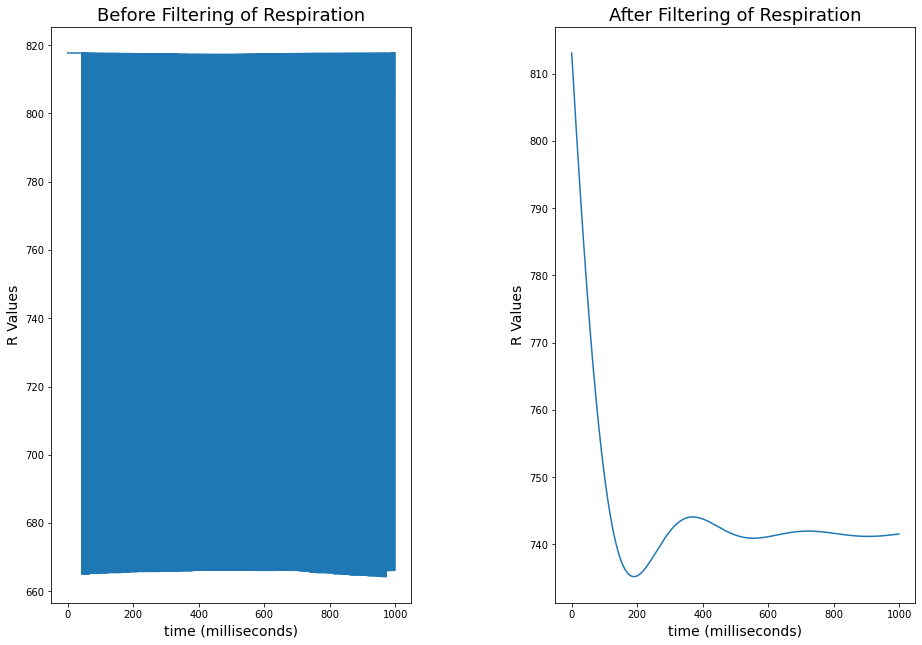

In [91]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# I have used the reference link of above mentioned 
b, a = signal.butter(5, 0.7, fs = 256)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html
filtered_r = signal.filtfilt(b, a, train_data1['r'], padlen=150)

train_data1['filtered_r'] = filtered_r



#Now Let's Check the Data After Filtering and Before Filtering

plt.figure(figsize = (15, 10))

plt.subplot(1, 2, 1)
subplot1 = train_data1[train_data1['experiment'] == 'CA']['r'][: 1000] #for 10 Seconds
plt.plot(subplot1)
plt.title('Before Filtering of Respiration', fontsize = 18)
plt.xlabel('time (milliseconds)', fontsize = 14)
plt.ylabel('R Values', fontsize = 14)


plt.subplot(1, 2, 2)
subplot2 = train_data1[train_data1['experiment'] == 'CA']['filtered_r'][: 1000] #for 10 Seconds
plt.plot(subplot2)
plt.title('After Filtering of Respiration', fontsize = 18)
plt.xlabel('time (milliseconds)', fontsize = 14)
plt.ylabel('R Values', fontsize = 14)



# set the spacing between subplots 
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4,  hspace=0.4) 
plt.show()

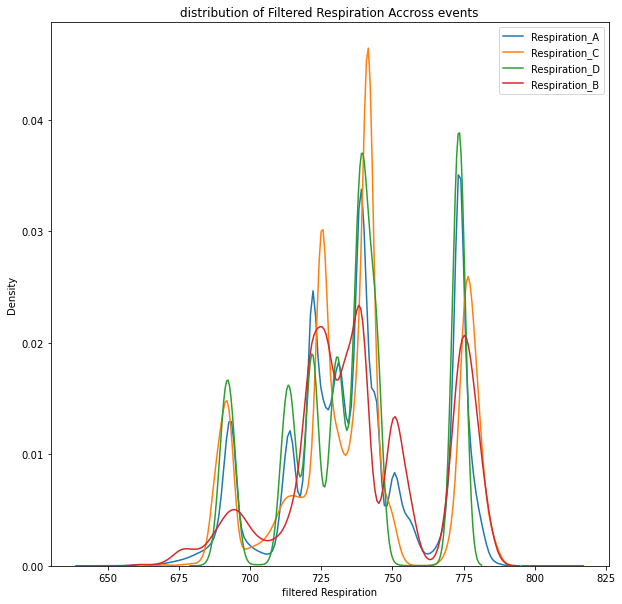

In [92]:
# Let's See How filtered respiration is Behaving with Different Classes
plt.figure(figsize=(10,10))
#After Filtering ecg rate
sns.distplot(train_data1[train_data1['event'] == 'A']['filtered_r'], hist=False, label="Respiration_A")
sns.distplot(train_data1[train_data1['event'] == 'C']['filtered_r'], hist=False, label="Respiration_C")
sns.distplot(train_data1[train_data1['event'] == 'D']['filtered_r'], hist=False, label="Respiration_D")
sns.distplot(train_data1[train_data1['event'] == 'B']['filtered_r'], hist=False, label="Respiration_B")
plt.title('distribution of Filtered Respiration Accross events')
plt.xlabel('filtered Respiration')
plt.legend()
plt.show()

- <b>Conclusion </b>

    1. Here, you can See that after filtering the noise in the respiration data is removed and the data is more cleaned now..

#### Now Let's use Biosspy to count the respiration rate, heart, which is a more useful metric than the raw waveform.

- refer: https://biosppy.readthedocs.io/en/stable/biosppy.html

- The package biosspy returns timestamped values, so we will use cubic interpolation to give values for timestamps in between.
    refer: https://www.kaggle.com/shahaffind/reducing-commercial-aviation-fatalities-11th

In [93]:
from scipy.interpolate import interp1d


##Let's divide the whole dataset into subsets based on experiments
subset_ca = train_data1[train_data1['experiment'] == 'CA']
subset_da = train_data1[train_data1["experiment"] == 'DA']
subset_ss = train_data1[train_data1["experiment"] == "SS"]



In [94]:
subset_ca.head(2)

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event,filtered_ecg,filtered_r
0,1,CA,0.011719,1,-5.28545,26.775801,-9.52731,-12.79320,16.7178,33.737499,...,19.201900,20.5968,-3.95115,14.5076,-4520.0,817.705994,388.829987,A,-4519.999997,813.093480
1,1,CA,0.015625,1,-2.42842,28.430901,-9.32351,-3.75723,15.9693,30.443600,...,19.689501,21.3547,1.33212,17.7502,-4520.0,817.705994,388.829987,A,-4515.547104,812.258676


#### ECG

In [95]:
#getting only experiments with ca
ecg_ca = ecg.ecg(subset_ca['filtered_ecg'].values, sampling_rate=256., show=False)

# getting only experiments with da
ecg_da = ecg.ecg(subset_da['filtered_ecg'].values, sampling_rate=256., show=False)

#getting only experiments with ss
ecg_ss = ecg.ecg(subset_ss['filtered_ecg'].values, sampling_rate=256., show=False)
print(ecg_ss.keys())

['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


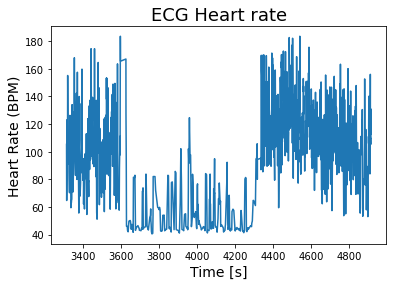

In [96]:
plt.plot(ecg_ca['heart_rate_ts'][2000: 3500], ecg_ca['heart_rate'][2000: 3500]) #15 seconds
plt.title('ECG Heart rate', fontsize = 18)
plt.ylabel('Heart Rate (BPM)', fontsize = 14)
plt.xlabel('Time [s]', fontsize = 14);

<b>Note:</b>The package 'biosspy' we use only returns timestamped values, so we will use **cubic interpolation** to give values for timestamps in between. 

In [97]:
bio_lst = [('CA', ecg_ca), ('DA', ecg_da), ('SS', ecg_ss)]

#List to concatenate all the results of interpolate Function
result_ecg = []

for pair in bio_lst:
  subset = train_data1[train_data1["experiment"] == pair[0]]["time"]
  inter_result = interpolation_method(subset, pair[1]["heart_rate_ts"], pair[1]["heart_rate"])
  result_ecg.extend(inter_result)
  

train_data1["ecg_rate"]=result_ecg


In [98]:
#delete for memory efficient
del result_ecg

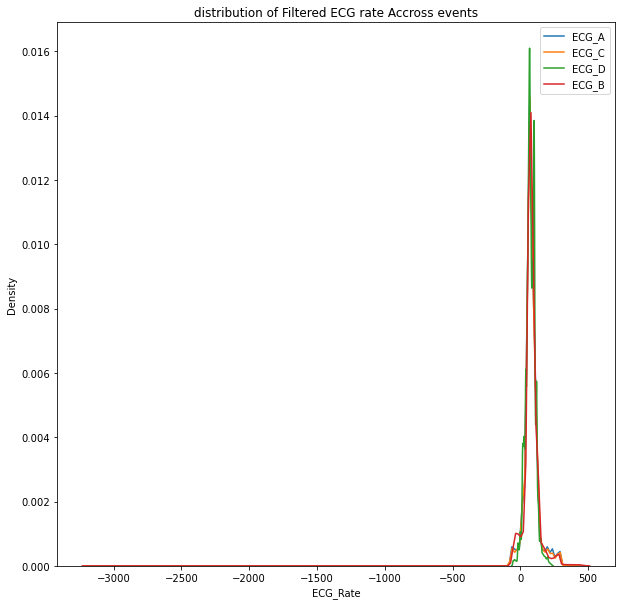

In [99]:
# Let's See How ECGrate is Behaving with Different Classes
plt.figure(figsize=(10,10))
#After Filtering ecg rate
sns.distplot(train_data1[train_data1['event'] == 'A']['ecg_rate'], hist=False, label="ECG_A")
sns.distplot(train_data1[train_data1['event'] == 'C']['ecg_rate'], hist=False, label="ECG_C")
sns.distplot(train_data1[train_data1['event'] == 'D']['ecg_rate'], hist=False, label="ECG_D")
sns.distplot(train_data1[train_data1['event'] == 'B']['ecg_rate'], hist=False, label="ECG_B")
plt.title('distribution of Filtered ECG rate Accross events')
plt.xlabel('ECG_Rate')
plt.legend()
plt.show()


- Here we can see that there is not significant results but Somehow the ECG of Class event D is more peaked
when compared with other events ECG, we can keep a look at this Feature and Use Feature Selection
Techniques.


### Respiration

In [100]:
#getting only experiments with ca
r_ca = resp.resp(subset_ca['filtered_r'].values, sampling_rate=256., show=False)

# getting only experiments with da
r_da = resp.resp(subset_da['filtered_r'].values, sampling_rate=256., show=False)

#getting only experiments with ss
r_ss = resp.resp(subset_ss['filtered_r'].values, sampling_rate=256., show=False)
print(r_ss.keys())

['ts', 'filtered', 'zeros', 'resp_rate_ts', 'resp_rate']


In [101]:
bio_lst = [('CA', r_ca), ('DA', r_da), ('SS', r_ss)]

#List to concatenate all the results of interpolate Function
result_r = []

for pair in bio_lst:
  subset = train_data1[train_data1["experiment"] == pair[0]]["time"]
  inter_result = interpolation_method(subset, pair[1]["resp_rate_ts"], pair[1]["resp_rate"])
  result_r.extend(inter_result)
  

train_data1["r_rate"]=result_r


In [102]:
#delete for memory efficient
del result_r

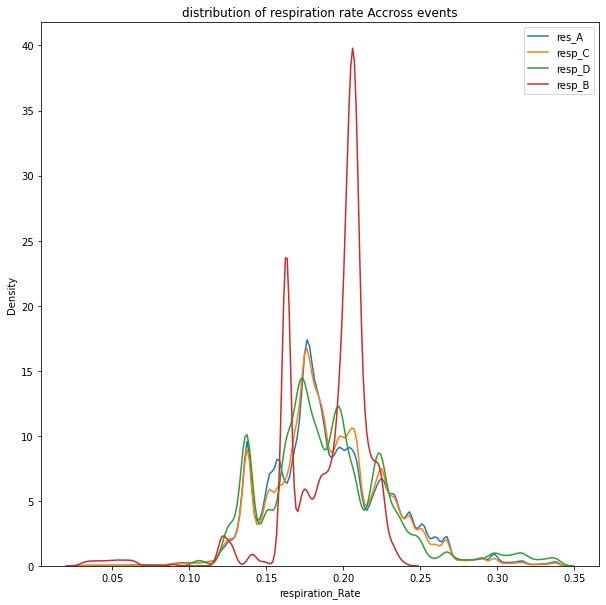

In [103]:
# Let's See How respiration rate is Behaving with Different Classes
plt.figure(figsize=(10,10))
#After Filtering ecg rate
sns.distplot(train_data1[train_data1['event'] == 'A']['r_rate'], hist=False, label="res_A")
sns.distplot(train_data1[train_data1['event'] == 'C']['r_rate'], hist=False, label="resp_C")
sns.distplot(train_data1[train_data1['event'] == 'D']['r_rate'], hist=False, label="resp_D")
sns.distplot(train_data1[train_data1['event'] == 'B']['r_rate'], hist=False, label="resp_B")
plt.title('distribution of respiration rate Accross events')
plt.xlabel('respiration_Rate')
plt.legend()
plt.show()


- From Above It is Significant that Event B is SomeWhat outsourcing All events regarding Respiration rate and
  May be this Feature become key to distinguish Event B when Compared to Others

### Getting Potential Difference for EEG Features


In [104]:
#Source: https://www.kaggle.com/stuartbman/introduction-to-physiological-data


features_lst = [['fp1_f7', 'eeg_fp1', 'eeg_f7'], 
                ['f7_t3', 'eeg_f7', 'eeg_t3'], 
                ['t3_t5', 'eeg_t3', 'eeg_t5'],
                ['t5_o1', 'eeg_t5', 'eeg_o1'], 
                ['fp1_f3', 'eeg_fp1', 'eeg_f7'],
                ['f3_c3', 'eeg_f3', 'eeg_c3'],
                ['c3_p3', 'eeg_c3', 'eeg_p3'],
                ['p3_o1', 'eeg_p3', 'eeg_o1'],
                ['fz_cz', 'eeg_fz', 'eeg_cz'],
                ['cz_pz', 'eeg_cz', 'eeg_pz'],
                ['pz_poz', 'eeg_pz', 'eeg_poz'], 
                ['fp2_f8', 'eeg_fp2', 'eeg_f8'], 
                ['f8_t4', 'eeg_f8', 'eeg_t4'],
                ['t4_t6', 'eeg_t4', 'eeg_t6'],
                ['t6_o2', 'eeg_t6', 'eeg_o2'],
                ['fp2_f4', 'eeg_fp2', 'eeg_f4'],
                ['f4_c4', 'eeg_f4', 'eeg_c4'],
                ['c4_p4', 'eeg_c4', 'eeg_p4'],
                ['p4_o2', 'eeg_p4', 'eeg_o2']]

derived_features = ['fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3', 'p3_o1', 'fz_cz', 'cz_pz', 'pz_poz', 'fp2_f8', 'f8_t4', 
                    't4_t6', 't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2']


#This Function Helps to get all derived Features
for pair in features_lst:
  derived = pair[0]
  f1 = pair[1]
  f2 = pair[2]
  train_data1[derived] = train_data1[f1] - train_data1[f2]

#### Let's Use T-sne Plot to check whether these EEG features Alone Help to Distinguish Events

- **Multivariate Analysis**

In [105]:
train_data1.columns


Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event',
       'filtered_ecg', 'filtered_r', 'ecg_rate', 'r_rate', 'fp1_f7', 'f7_t3',
       't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3', 'p3_o1', 'fz_cz', 'cz_pz',
       'pz_poz', 'fp2_f8', 'f8_t4', 't4_t6', 't6_o2', 'fp2_f4', 'f4_c4',
       'c4_p4', 'p4_o2'],
      dtype='object')

In [106]:
#mapping categorical column event into Numerical
#Let's map categorical to numberical for event Column
all_classes = train_data1['event'].unique()
print(all_classes)
#Encoding target Columns
map_classes = {}
i = 0
for classes in all_classes:
 map_classes[classes] = i
 i += 1
print(map_classes)
train_data1['event1'] = train_data1['event'].map(map_classes)

['A' 'C' 'D' 'B']
{'A': 0, 'C': 1, 'D': 2, 'B': 3}


In [107]:
#as the Dataset is large Lets Take only sample from each event and use T-sne

#takink indices based on the Class events
event_A = list(train_data1[train_data1['event'] == 'A'].index)
event_C = list(train_data1[train_data1['event'] == 'C'].index)
event_D = list(train_data1[train_data1['event'] == 'D'].index)
event_B = list(train_data1[train_data1['event'] == 'B'].index)


# importing random module
import random
# the value of n
n = 10000

sample_A = random.sample(event_A, n)
sample_C = random.sample(event_C, n)
sample_D = random.sample(event_D, n)
sample_B = random.sample(event_B, n)
print("Sample Datapoints indices")
print("Event: 0", sample_A[: 5])
print("Event: 1", sample_C[: 5])
print("Event: 2", sample_D[: 5])
print("Event: 3", sample_B[: 5])
total_samples = sample_A + sample_C + sample_D + sample_B

Sample Datapoints indices
Event: 0 [57806, 191084, 166424, 250573, 181781]
Event: 1 [115503, 172862, 148877, 133968, 74518]
Event: 2 [39360, 27605, 3192, 78506, 23778]
Event: 3 [225541, 251543, 43508, 42433, 136420]


In [108]:
X = train_data1.iloc[total_samples][derived_features]
y = train_data1.iloc[total_samples]['event1']


In [109]:
X.head()

,fp1_f7,f7_t3,t3_t5,t5_o1,fp1_f3,f3_c3,c3_p3,p3_o1,fz_cz,cz_pz,pz_poz,fp2_f8,f8_t4,t4_t6,t6_o2,fp2_f4,f4_c4,c4_p4,p4_o2
57806,1.806190,10.58157,-14.93282,-5.07385,1.806190,-2.805530,3.344360,-6.56663,-7.33775,-8.220060,1.978100,10.058460,-3.157940,4.14799,-14.55379,6.985020,4.055660,-6.240330,-8.305630
191084,-7.877601,17.41700,5.87710,8.52180,-7.877601,-9.806999,5.667499,12.52260,34.72017,34.641102,-83.142601,-7.545398,17.878799,4.08960,11.75700,10.917801,1.916399,-2.596800,15.942601
166424,-10.355010,9.23955,4.40645,6.11241,-10.355010,3.916950,5.798730,3.60923,12.15347,-17.116120,3.095337,2.196359,7.425231,-3.99184,0.00142,-3.846510,-42.476151,47.813979,4.139852
4971,10.475700,-5.72825,-8.54671,-2.47938,10.475700,-4.274430,-5.700020,-5.47089,-2.80162,-4.855970,-0.158410,3.206400,-15.541060,2.86075,-2.98984,0.791600,-6.107910,-2.352400,-4.795040
181781,25.996490,-14.70188,-0.20986,2.47834,25.996490,-5.305230,-1.788840,-5.80904,0.47480,9.845630,2.990004,7.183259,14.748050,-18.55081,11.09465,11.574339,-9.013640,8.665460,3.248990


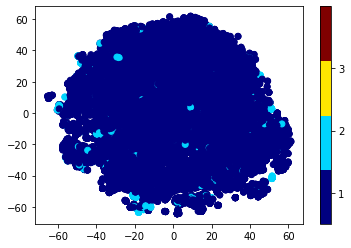

In [110]:
#T-sne Plot

from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(X)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c = y, cmap=plt.cm.get_cmap("jet", 4))
plt.colorbar(ticks=range(4))
plt.clim(0.5, 4)
plt.show()

- Here we can see that this EEG Features are somehow helping to distinguish class events.And also there is
  Grouping Present for events 'A' and 'C'

In [111]:
#deleting X and y
del X
del y

### Getting Power Features for EEG

**Notes:** Electroencephalography (EEG) power features represents amount of activity in certain frequency bands of
the signal while coherence between different electrodes reflects the degree to which connections are present
across brain regions

Description:

    Delta (<4Hz) : Slow wave sleep, continous attention tasks
    Theta (4-7Hz) : Drowsiness, repression of elicited responses
    Alpha (8-15Hz) : Relaxed, eyes closed
    Beta (16-31Hz) : Active thinking, focus, alert
    Gamma (>32Hz) : Short term memory, cross sensory perception

#### Grouping EEG Features

In [112]:
#Taking all the features of EEG into seperate list

all_features = train_data1.columns #This will give all columns in the DataSet
eeg_features = []
for feature in all_features:
 if feature[0: 2] == 'ee':
     eeg_features.append(feature)
        
print(eeg_features)

['eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2']


In [113]:
#getting only experiments with ca
eeg_ca = eeg.get_power_features(subset_ca[eeg_features].values, sampling_rate=256.)
# getting only experiments with da
eeg_da = eeg.get_power_features(subset_da[eeg_features].values, sampling_rate=256.)
#getting only experiments with ss
eeg_ss = eeg.get_power_features(subset_ss[eeg_features].values, sampling_rate=256.)
# print(egg_ss.keys()) #this generates all EEG signals

In [114]:
#printing the keys in EEG
eeg_ss.keys()

['ts', 'theta', 'alpha_low', 'alpha_high', 'beta', 'gamma']

#### Getting names of all derived Features

In [115]:
#Getting all Features Names

def get_derived_names(f_name):
    
    derived_lst = []
    for eeg_feat in eeg_features:
        derived_lst.append(eeg_feat + f_name)
    
    return derived_lst

#theta Names
theta_features = get_derived_names('_theta')

#high Alpha
high_alpha_features = get_derived_names('_high_alpha')

#low alpha
low_alpha_features = get_derived_names('_low_alpha')

#Beta
beta_features = get_derived_names('_beta')

#gamma
gamma_features = get_derived_names('_gamma')



#sanity check
print("Theta Features: ", theta_features[: 5])
print("gamma Features: ", gamma_features[: 5])
print("beta_features: ", beta_features[: 5])
print("Alpha Low: ", low_alpha_features[: 5])
print("Alpha High", high_alpha_features[: 5])

Theta Features:  ['eeg_fp1_theta', 'eeg_f7_theta', 'eeg_f8_theta', 'eeg_t4_theta', 'eeg_t6_theta']
gamma Features:  ['eeg_fp1_gamma', 'eeg_f7_gamma', 'eeg_f8_gamma', 'eeg_t4_gamma', 'eeg_t6_gamma']
beta_features:  ['eeg_fp1_beta', 'eeg_f7_beta', 'eeg_f8_beta', 'eeg_t4_beta', 'eeg_t6_beta']
Alpha Low:  ['eeg_fp1_low_alpha', 'eeg_f7_low_alpha', 'eeg_f8_low_alpha', 'eeg_t4_low_alpha', 'eeg_t6_low_alpha']
Alpha High ['eeg_fp1_high_alpha', 'eeg_f7_high_alpha', 'eeg_f8_high_alpha', 'eeg_t4_high_alpha', 'eeg_t6_high_alpha']


#### Getting Theta Features

In [118]:
#how to concatenate dataframes: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
for i in range(len(eeg_features)):
    
    
    #getting theta Features seperately
    subset_theta_ca = interpolation_method(subset_ca["time"], eeg_ca["ts"], eeg_ca["theta"][:, i])
    subset_theta_da = interpolation_method(subset_da['time'], eeg_da["ts"], eeg_da["theta"][:, i])
    subset_theta_ss = interpolation_method(subset_ss['time'], eeg_ss["ts"], eeg_ss["theta"][:, i])
    
    train_data1[theta_features[i]] = np.concatenate((subset_theta_ca,subset_theta_da,subset_theta_ss))

train_data1[theta_features].head()

,eeg_fp1_theta,eeg_f7_theta,eeg_f8_theta,eeg_t4_theta,eeg_t6_theta,eeg_t5_theta,eeg_t3_theta,eeg_fp2_theta,eeg_o1_theta,eeg_p3_theta,eeg_pz_theta,eeg_f3_theta,eeg_fz_theta,eeg_f4_theta,eeg_c4_theta,eeg_p4_theta,eeg_poz_theta,eeg_c3_theta,eeg_cz_theta,eeg_o2_theta
0,0.004559,0.005408,0.007395,0.013913,0.016628,0.016326,0.028105,0.002912,0.010773,0.030777,-0.005532,0.008172,0.027576,0.001509,-0.001474,0.013123,0.010023,0.010081,0.066747,0.022121
1,0.004184,0.006137,0.007028,0.012604,0.016350,0.016588,0.028054,0.002271,0.010531,0.030558,-0.008749,0.008424,0.028605,0.000843,-0.002205,0.012072,0.009585,0.010025,0.068797,0.021930
2,0.003853,0.006855,0.006704,0.011443,0.016102,0.016846,0.028008,0.001704,0.010315,0.030365,-0.011617,0.008687,0.029625,0.000252,-0.002814,0.011135,0.009194,0.009987,0.070812,0.021760
3,0.003565,0.007562,0.006422,0.010424,0.015882,0.017100,0.027969,0.001208,0.010126,0.030197,-0.014148,0.008959,0.030635,-0.000265,-0.003307,0.010308,0.008848,0.009964,0.072793,0.021610
4,0.003318,0.008258,0.006181,0.009545,0.015690,0.017349,0.027935,0.000781,0.009963,0.030053,-0.016350,0.009239,0.031636,-0.000710,-0.003685,0.009589,0.008547,0.009956,0.074743,0.021480


#### Getting Gamma Features


In [119]:
for i in range(len(eeg_features)):
    
    
    #getting theta Features seperately
    subset_gamma_ca = interpolation_method(subset_ca["time"], eeg_ca["ts"], eeg_ca["gamma"][:, i])
    subset_gamma_da = interpolation_method(subset_da['time'], eeg_da["ts"], eeg_da["gamma"][:, i])
    subset_gamma_ss = interpolation_method(subset_ss['time'], eeg_ss["ts"], eeg_ss["gamma"][:, i])
    
    train_data1[gamma_features[i]] = np.concatenate((subset_gamma_ca, subset_gamma_da,subset_gamma_ss))

train_data1[gamma_features].head()

,eeg_fp1_gamma,eeg_f7_gamma,eeg_f8_gamma,eeg_t4_gamma,eeg_t6_gamma,eeg_t5_gamma,eeg_t3_gamma,eeg_fp2_gamma,eeg_o1_gamma,eeg_p3_gamma,eeg_pz_gamma,eeg_f3_gamma,eeg_fz_gamma,eeg_f4_gamma,eeg_c4_gamma,eeg_p4_gamma,eeg_poz_gamma,eeg_c3_gamma,eeg_cz_gamma,eeg_o2_gamma
0,0.001065,0.000678,0.003289,0.005234,0.001817,0.000326,0.002143,0.000406,0.000822,0.000562,0.000430,0.000344,0.000158,0.000653,0.009509,0.001241,0.001097,0.000758,0.000654,0.001576
1,0.001054,0.000676,0.003398,0.005819,0.001816,0.000355,0.002139,0.000450,0.000825,0.000588,0.000427,0.000345,0.000196,0.000700,0.009364,0.001229,0.001093,0.000768,0.000649,0.001577
2,0.001044,0.000675,0.003502,0.006387,0.001815,0.000382,0.002136,0.000493,0.000829,0.000613,0.000425,0.000347,0.000234,0.000745,0.009248,0.001218,0.001089,0.000777,0.000644,0.001577
3,0.001035,0.000675,0.003601,0.006937,0.001814,0.000409,0.002133,0.000535,0.000832,0.000638,0.000422,0.000349,0.000270,0.000789,0.009159,0.001209,0.001086,0.000787,0.000640,0.001578
4,0.001027,0.000675,0.003696,0.007471,0.001813,0.000435,0.002130,0.000575,0.000835,0.000663,0.000421,0.000352,0.000305,0.000831,0.009096,0.001200,0.001083,0.000796,0.000637,0.001579


#### Getting Beta Features

In [120]:
for i in range(len(eeg_features)):
    
    
    #getting theta Features seperately
    subset_beta_ca = interpolation_method(subset_ca["time"], eeg_ca["ts"], eeg_ca["beta"][:, i])
    subset_beta_da = interpolation_method(subset_da['time'], eeg_da["ts"], eeg_da["beta"][:, i])
    subset_beta_ss = interpolation_method(subset_ss['time'], eeg_ss["ts"], eeg_ss["beta"][:, i])
    
    train_data1[beta_features[i]] = np.concatenate((subset_beta_ca, subset_beta_da,subset_beta_ss))

train_data1[beta_features].head()

,eeg_fp1_beta,eeg_f7_beta,eeg_f8_beta,eeg_t4_beta,eeg_t6_beta,eeg_t5_beta,eeg_t3_beta,eeg_fp2_beta,eeg_o1_beta,eeg_p3_beta,eeg_pz_beta,eeg_f3_beta,eeg_fz_beta,eeg_f4_beta,eeg_c4_beta,eeg_p4_beta,eeg_poz_beta,eeg_c3_beta,eeg_cz_beta,eeg_o2_beta
0,0.004095,0.002901,0.002257,0.005613,0.002380,0.001817,0.006353,0.004166,0.000886,0.001504,0.002216,0.001314,0.002030,0.002443,0.010973,0.002140,0.000533,0.002474,0.001474,0.002922
1,0.004102,0.002943,0.002254,0.005750,0.002379,0.001865,0.006430,0.004131,0.000806,0.001655,0.002208,0.001492,0.002067,0.002568,0.011426,0.002143,0.000486,0.002584,0.001460,0.003006
2,0.004109,0.002982,0.002251,0.005887,0.002377,0.001914,0.006506,0.004099,0.000733,0.001799,0.002200,0.001662,0.002103,0.002688,0.011862,0.002145,0.000445,0.002689,0.001447,0.003087
3,0.004118,0.003020,0.002249,0.006023,0.002376,0.001963,0.006581,0.004071,0.000668,0.001938,0.002194,0.001824,0.002137,0.002803,0.012279,0.002147,0.000409,0.002788,0.001437,0.003166
4,0.004126,0.003056,0.002246,0.006158,0.002375,0.002014,0.006655,0.004046,0.000612,0.002071,0.002189,0.001979,0.002169,0.002913,0.012680,0.002149,0.000380,0.002883,0.001428,0.003241


In [121]:
#Getting Alpha Low features

for i in range(len(eeg_features)):
    
    
    #getting theta Features seperately
    subset_alphaLow_ca = interpolation_method(subset_ca["time"], eeg_ca["ts"], eeg_ca["alpha_low"][:, i])
    subset_alphaLow_da = interpolation_method(subset_da['time'], eeg_da["ts"], eeg_da["alpha_low"][:, i])
    subset_alphaLow_ss = interpolation_method(subset_ss['time'], eeg_ss["ts"], eeg_ss["alpha_low"][:, i])
    
    train_data1[low_alpha_features[i]] = np.concatenate((subset_alphaLow_ca, subset_alphaLow_da,subset_alphaLow_ss))

train_data1[low_alpha_features].head()

,eeg_fp1_low_alpha,eeg_f7_low_alpha,eeg_f8_low_alpha,eeg_t4_low_alpha,eeg_t6_low_alpha,eeg_t5_low_alpha,eeg_t3_low_alpha,eeg_fp2_low_alpha,eeg_o1_low_alpha,eeg_p3_low_alpha,eeg_pz_low_alpha,eeg_f3_low_alpha,eeg_fz_low_alpha,eeg_f4_low_alpha,eeg_c4_low_alpha,eeg_p4_low_alpha,eeg_poz_low_alpha,eeg_c3_low_alpha,eeg_cz_low_alpha,eeg_o2_low_alpha
0,0.001898,0.007444,0.002359,0.003041,0.001908,0.001822,0.001881,0.002340,0.002145,0.002581,0.000125,0.005387,0.003297,0.000933,0.002232,0.001808,0.001360,0.001234,0.001309,0.000907
1,0.001837,0.007558,0.002648,0.003181,0.002035,0.002005,0.001885,0.002273,0.002125,0.002579,0.000079,0.005473,0.003768,0.001102,0.002508,0.001780,0.001262,0.001329,0.001153,0.000926
2,0.001783,0.007672,0.002926,0.003314,0.002160,0.002179,0.001889,0.002215,0.002107,0.002577,0.000040,0.005557,0.004228,0.001266,0.002773,0.001755,0.001174,0.001422,0.001018,0.000950
3,0.001735,0.007785,0.003194,0.003441,0.002283,0.002345,0.001892,0.002164,0.002091,0.002576,0.000009,0.005640,0.004677,0.001426,0.003028,0.001734,0.001097,0.001514,0.000905,0.000979
4,0.001693,0.007897,0.003451,0.003562,0.002403,0.002503,0.001895,0.002120,0.002079,0.002575,-0.000015,0.005722,0.005116,0.001582,0.003271,0.001715,0.001029,0.001606,0.000812,0.001013


In [122]:
#Getting Alpha High features

for i in range(len(eeg_features)):
    
    
    #getting theta Features seperately
    subset_alphaHigh_ca = interpolation_method(subset_ca["time"], eeg_ca["ts"], eeg_ca["alpha_high"][:, i])
    subset_alphaHigh_da = interpolation_method(subset_da['time'], eeg_da["ts"], eeg_da["alpha_high"][:, i])
    subset_alphaHigh_ss = interpolation_method(subset_ss['time'], eeg_ss["ts"], eeg_ss["alpha_high"][:, i])
    
    train_data1[high_alpha_features[i]] = np.concatenate((subset_alphaHigh_ca, subset_alphaHigh_da,subset_alphaHigh_ss))

train_data1[high_alpha_features].head()

,eeg_fp1_high_alpha,eeg_f7_high_alpha,eeg_f8_high_alpha,eeg_t4_high_alpha,eeg_t6_high_alpha,eeg_t5_high_alpha,eeg_t3_high_alpha,eeg_fp2_high_alpha,eeg_o1_high_alpha,eeg_p3_high_alpha,eeg_pz_high_alpha,eeg_f3_high_alpha,eeg_fz_high_alpha,eeg_f4_high_alpha,eeg_c4_high_alpha,eeg_p4_high_alpha,eeg_poz_high_alpha,eeg_c3_high_alpha,eeg_cz_high_alpha,eeg_o2_high_alpha
0,0.002003,0.005664,0.004295,0.007041,0.001613,0.004067,0.001271,0.000631,0.004002,0.002557,0.000711,0.006475,0.001546,0.003503,0.004798,0.002157,0.001501,0.005812,0.002571,0.002405
1,0.002322,0.005684,0.004443,0.007507,0.001726,0.004066,0.001331,0.000286,0.003983,0.002556,0.000694,0.006458,0.001845,0.003975,0.005096,0.002182,0.001486,0.005788,0.002614,0.002387
2,0.002638,0.005708,0.004589,0.007953,0.001835,0.004065,0.001390,-0.000019,0.003967,0.002554,0.000679,0.006442,0.002136,0.004439,0.005382,0.002207,0.001472,0.005767,0.002656,0.002372
3,0.002950,0.005736,0.004732,0.008381,0.001940,0.004065,0.001450,-0.000284,0.003952,0.002553,0.000668,0.006430,0.002420,0.004895,0.005659,0.002230,0.001460,0.005749,0.002697,0.002359
4,0.003260,0.005768,0.004872,0.008789,0.002041,0.004066,0.001508,-0.000512,0.003940,0.002552,0.000659,0.006419,0.002696,0.005342,0.005925,0.002252,0.001450,0.005733,0.002738,0.002347


In [123]:
# Let Store all features

train_data1.to_csv("final_features")

#### Reading Final Features

In [4]:
# https://distributed.dask.org/en/latest/manage-computation.html
train_data1 = dd.read_csv("final_features")
train_data1 = train_data1.compute()
train_data1.drop('Unnamed: 0', axis = 1, inplace = True)
print("number of rows in train are {} and columns are {}".format(train_data1.shape[0], train_data1.shape[1]))
train_data1.head()

number of rows in train are 4867421 and columns are 152


,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_pz_high_alpha,eeg_f3_high_alpha,eeg_fz_high_alpha,eeg_f4_high_alpha,eeg_c4_high_alpha,eeg_p4_high_alpha,eeg_poz_high_alpha,eeg_c3_high_alpha,eeg_cz_high_alpha,eeg_o2_high_alpha
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,0.000711,0.006475,0.001546,0.003503,0.004798,0.002157,0.001501,0.005812,0.002571,0.002405
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,0.000694,0.006458,0.001845,0.003975,0.005096,0.002182,0.001486,0.005788,0.002614,0.002387
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,0.000679,0.006442,0.002136,0.004439,0.005382,0.002207,0.001472,0.005767,0.002656,0.002372
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,0.000668,0.006430,0.002420,0.004895,0.005659,0.002230,0.001460,0.005749,0.002697,0.002359
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,0.000659,0.006419,0.002696,0.005342,0.005925,0.002252,0.001450,0.005733,0.002738,0.002347


In [6]:
#Downcasting so as to be memory Efficient
# Blog: https://medium.com/@deepakec1031/how-to-reduce-pandas-data-frame-size-using-downcast-e00cfed8e2c5

# install the package
!pip install downcast

In [5]:
from downcast import reduce

train_data1 = reduce(train_data1)

### Feature Selection


### 1.Decision Based Classifiers

- here we have split into train and Cross Validation and we can also see what all values present in y train and It's respective counts

In [6]:
#remove some feature that shows no effect in EDA Analysis and also Target Variables

# https://numpy.org/doc/stable/reference/generated/numpy.unique.html

X = train_data1.drop(['crew', 'experiment', 'time', 'seat', 'event', 'event1'], axis = 1)

y = train_data1['event1']


# splitting the data into train and test dataset
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 30, stratify = y)

#printing shapes
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_cv.shape)

print("Number of Unique Values in y_train: ", np.unique(y_train,return_counts=True))

X_train Shape:  (3407194, 146)
X_test Shape:  (1460227, 146)
Number of Unique Values in y_train:  (array([0, 1, 2, 3], dtype=int8), array([1994166, 1156880,  164730,   91418]))


In [7]:
#all columns in train and Test
features_lst = X_train.columns
print(features_lst[: 5])

Index(['eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6'], dtype='object')


#### now Let's Do normalizing Because all values becomes into range 0 to 1 and It's Become Good For model to train Fastly

In [21]:
from sklearn.preprocessing import MinMaxScaler

# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# https://stackoverflow.com/questions/43675665/when-scale-the-data-why-the-train-dataset-use-fit-and-transform-but-the-te


min_max_scaler = MinMaxScaler()


X_train = min_max_scaler.fit_transform(X_train)
X_cv = min_max_scaler.transform(X_cv)


In [35]:
!pip install lightgbm

In [37]:
import lightgbm as lgb

In [34]:
#Let's use LightGBm Model rather than Random Forest or XGBoost as It train more Faster than those..
#This article Helps a Lot: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
#Documentation: https://lightgbm.readthedocs.io/en/latest/Parameters.html

# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html


params = {
    'objective':'multiclass',
    'num_class':4,
    'metric':'multi_error',
    'num_leaves': 20,
    'min_child_weight': 40,
    'learning_rate':0.1,
    'bagging_fraction':0.8,
    'feature_fraction':0.5,
    'reg_alpha':0.15,
    'reg_alpha':0.15,
    'verbosity':-1
}




lgb_train = lgb.Dataset(X_train,label=y_train)
lgb_cv = lgb.Dataset(X_cv,y_cv)
model = lgb.train(params, lgb_train, 500, valid_sets=[lgb_cv], early_stopping_rounds = 25, verbose_eval = 80)


Training until validation scores don't improve for 25 rounds
[80]	valid_0's multi_error: 0.0664828
[160]	valid_0's multi_error: 0.0429084
[240]	valid_0's multi_error: 0.029755
[320]	valid_0's multi_error: 0.0209906
[400]	valid_0's multi_error: 0.0145299
[480]	valid_0's multi_error: 0.0106134
Did not meet early stopping. Best iteration is:
[500]	valid_0's multi_error: 0.00985463


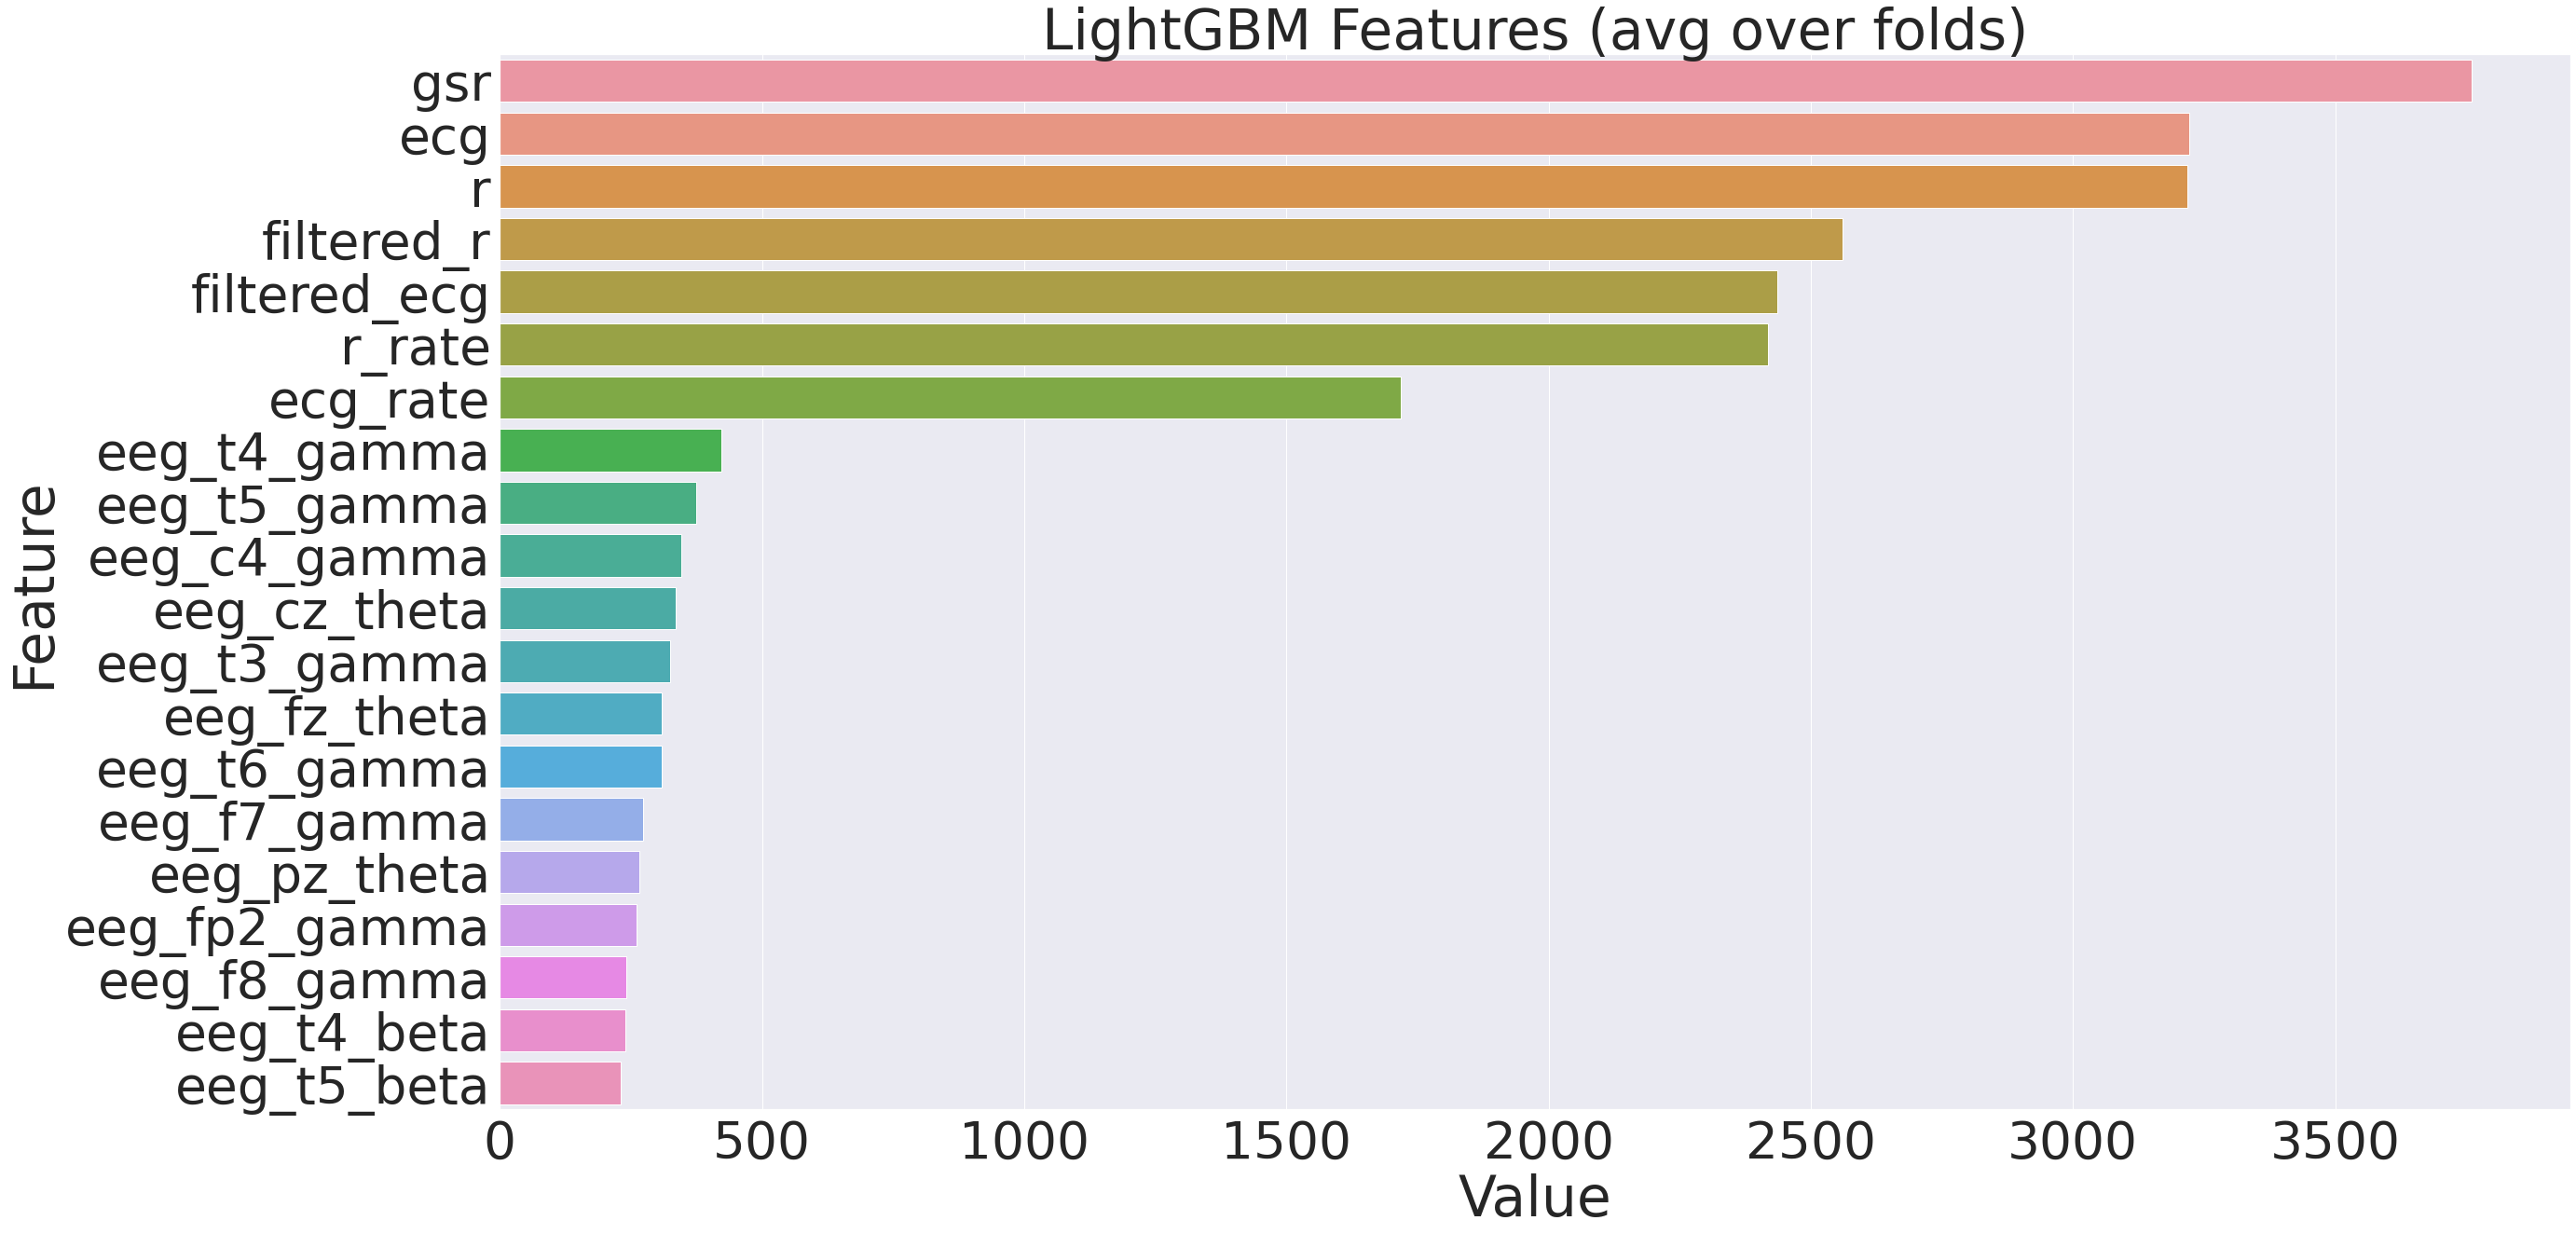

In [42]:
#getting Feature Importance of LightGBM model
# https://stackoverflow.com/questions/53413701/feature-importance-using-lightgbm

#creating a DataFrame of Columns and respective Features scores

features_df = pd.DataFrame({'Feature':X.columns, 'Value' : model.feature_importance()})
features_df.head()

plt.figure(figsize=(40, 20))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=features_df.sort_values(by="Value", ascending=False)[0: 20]) #Let's print Top 20
plt.title('Features and It's importances)
plt.tight_layout()
plt.savefig('lgbm_importances-01.png')
plt.show()

- From the plot we can Clearly See that GSR[Galvanic Skin Response] all other Features and ECG, R are performing 
  Quite Good than Filtered R and ECG which is Quite Intresting..And Our Derived Features are also adding Value to our Model so Feature Engineering also helped some what for this especially Gamma Features

### 1. Using Auto Encoders for Feature Extractions: 

- refer: https://machinelearningmastery.com/autoencoder-for-classification/

In [8]:
#splitting Train and Test 

#remove some feature that shows no effect in EDA Analysis and also Target Variables

# https://numpy.org/doc/stable/reference/generated/numpy.unique.html

X = train_data1.drop(['crew', 'experiment', 'time', 'seat', 'event', 'event1'], axis = 1)

y = train_data1['event1']


# splitting the data into train and test dataset
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 30, stratify = y)

#printing shapes
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_cv.shape)

print("Number of Unique Values in y_train: ", np.unique(y_train,return_counts=True))

X_train Shape:  (3407194, 146)
X_test Shape:  (1460227, 146)
Number of Unique Values in y_train:  (array([0, 1, 2, 3], dtype=int8), array([1994166, 1156880,  164730,   91418]))


In [9]:
#normalizing the data

from sklearn.preprocessing import MinMaxScaler

# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# https://stackoverflow.com/questions/43675665/when-scale-the-data-why-the-train-dataset-use-fit-and-transform-but-the-te


min_max_scaler = MinMaxScaler()


X_train = min_max_scaler.fit_transform(X_train)
X_cv = min_max_scaler.transform(X_cv)

#### Model Architecture

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.utils import plot_model

In [10]:
n_inputs = X_train.shape[1]
print(n_inputs)

146


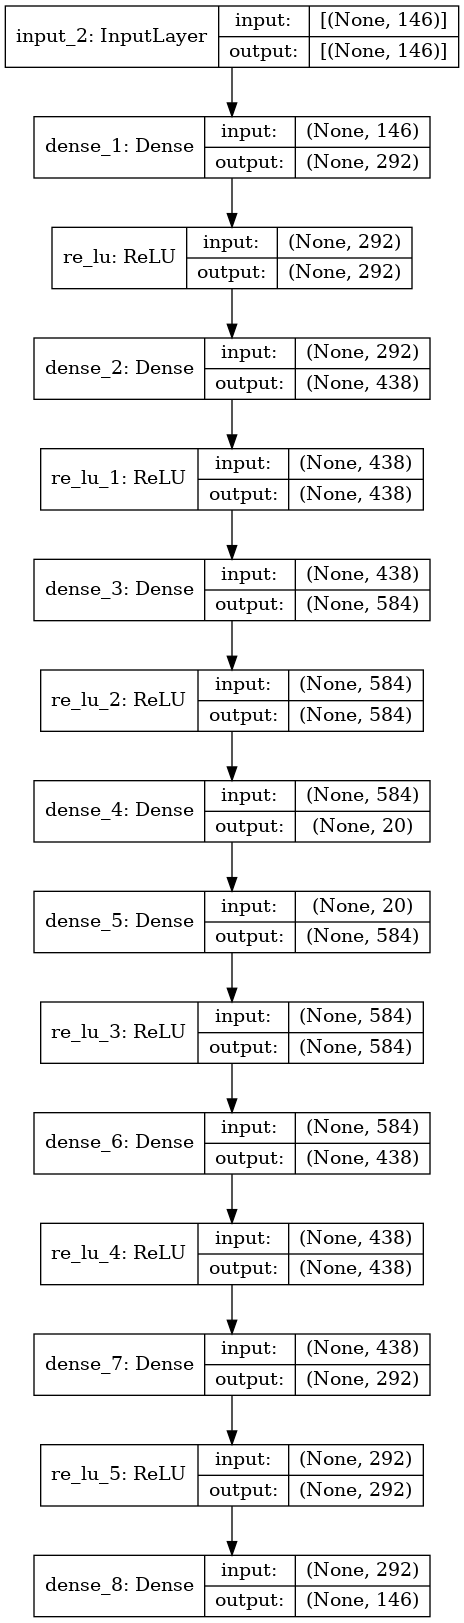

In [13]:
# define encoder
inputs = Input(shape=(n_inputs,))


# encoder level 1
dense1 = Dense(n_inputs*2)(inputs)
relu1 = ReLU()(dense1)



# encoder level 2
dense2 = Dense(n_inputs*3)(relu1)
relu2 = ReLU()(dense2)

#encoder level 3
dense3 = Dense(n_inputs*4)(relu2)
relu3 = ReLU()(dense3)


# bottleneck ===> here we get our required Number of Compressed Features
n_bottleneck = 20 # Let's take top 20 Compressed Features
bottleneck = Dense(n_bottleneck)(relu3)


# define decoder, level 1
dense1 = Dense(n_inputs * 4)(bottleneck)
relu1 = ReLU()(dense1)


# decoder level 2
dense2 = Dense(n_inputs * 3)(relu1)
relu2 = ReLU()(dense2)

#decoder level 3
dense3 = Dense(n_inputs *2)(relu2)
relu3 = ReLU()(dense3)

# output layer
output = Dense(n_inputs, activation='linear')(relu3)

# define autoencoder model
model = Model(inputs=inputs, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')


# plot the autoencoder
plot_model(model, 'autoencoder_compress1.png', show_shapes=True)
# fit the autoencoder model to reconstruct input

In [14]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs = 30, batch_size = 150, verbose = -1, validation_data=(X_cv, X_cv), workers = -1)

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [15]:
# define an encoder model (without the decoder)
encoder = Model(inputs = inputs, outputs = bottleneck)
# plot_model(encoder, 'final_encoder_compress1.png', show_shapes=True)
# save the encoder to file
encoder.save('finalencoder_compression.h5')

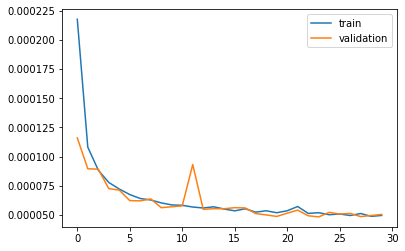

In [16]:
#plotting Loss
from matplotlib import pyplot

# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

#### Encoder as Data Preparation for Predictive Model

In [8]:
# loading the encoder model which we have Saved
from tensorflow.keras.models import load_model

encoder = load_model('finalencoder_compression.h5')

In [22]:
# encode the train data
X_train_encode_features = encoder.predict(X_train)
# encode the test data
X_cv_encode_features = encoder.predict(X_cv)

In [23]:
print("Shape After Encoding Train Data: ", X_train_encode_features.shape)
print("Shape After Encoding Validation Data: ", X_cv_encode_features.shape)

Shape After Encoding Train Data:  (3407194, 20)
Shape After Encoding Validation Data:  (1460227, 20)


In [24]:
#Sanity Check
X_train_encode_features[0]

array([ 0.02499208, -0.133879  ,  0.194339  ,  0.01311304,  0.03631131,
        0.0119801 , -0.03918884,  0.13399448,  0.09161344,  0.0608969 ,
        0.03050173, -0.06222426,  0.0060826 ,  0.15590242,  0.06307253,
       -0.02402263, -0.0692986 ,  0.01025103,  0.05541077,  0.01847266],
      dtype=float32)

In [25]:
#Merging all previous features with the new Encoded Features

#first Getting all features names

encoded_features_names = []

for i in range(X_train_encode_features.shape[1]):
    feature_name = 'encoded' + str(i + 1)
    encoded_features_names.append(feature_name)

print(encoded_features_names)

['encoded1', 'encoded2', 'encoded3', 'encoded4', 'encoded5', 'encoded6', 'encoded7', 'encoded8', 'encoded9', 'encoded10', 'encoded11', 'encoded12', 'encoded13', 'encoded14', 'encoded15', 'encoded16', 'encoded17', 'encoded18', 'encoded19', 'encoded20']


In [26]:
# creating the dataframe for Train
X_train_encoded_df = pd.DataFrame(data = X_train_encode_features,  columns = encoded_features_names) 
  
# displaying the dataframe 
X_train_encoded_df.head()

,encoded1,encoded2,encoded3,encoded4,encoded5,encoded6,encoded7,encoded8,encoded9,encoded10,encoded11,encoded12,encoded13,encoded14,encoded15,encoded16,encoded17,encoded18,encoded19,encoded20
0,0.024992,-0.133879,0.194339,0.013113,0.036311,0.011980,-0.039189,0.133994,0.091613,0.060897,0.030502,-0.062224,0.006083,0.155902,0.063073,-0.024023,-0.069299,0.010251,0.055411,0.018473
1,0.076345,0.097059,-0.127760,-0.069028,-0.017239,-0.067906,0.091632,0.072394,0.058590,0.031734,0.028580,-0.053244,-0.016084,-0.097164,-0.051888,0.026764,0.020912,-0.037336,-0.018083,-0.091350
2,-0.044187,0.017635,0.159956,0.010729,0.048050,-0.006388,-0.075179,-0.015327,-0.105470,-0.036892,-0.088170,-0.013445,0.027989,-0.003559,-0.008034,0.043253,-0.010773,0.034764,0.062274,-0.129418
3,0.018677,-0.035374,0.080619,0.044769,-0.007240,0.004824,0.185697,0.014081,-0.020379,-0.130895,0.035359,0.131051,0.131566,0.044292,-0.013607,-0.043503,-0.036864,-0.150416,-0.114719,-0.129715
4,-0.074912,-0.010483,0.022147,-0.019971,-0.039181,0.026046,-0.003974,-0.099144,0.021665,-0.003094,-0.012769,-0.001743,-0.013298,0.058908,0.073514,-0.103247,0.037946,0.097411,-0.069040,-0.053188


In [27]:
# creating the dataframe for CV
X_cv_encoded_df = pd.DataFrame(data = X_cv_encode_features,  columns = encoded_features_names) 
  
# displaying the dataframe 
X_cv_encoded_df.head()

,encoded1,encoded2,encoded3,encoded4,encoded5,encoded6,encoded7,encoded8,encoded9,encoded10,encoded11,encoded12,encoded13,encoded14,encoded15,encoded16,encoded17,encoded18,encoded19,encoded20
0,0.014165,0.024529,-0.070273,0.130597,-0.101215,-0.035341,0.152039,-0.021947,-0.059644,-0.091585,0.048894,-0.032837,0.135271,-0.006526,-0.043728,0.086752,-0.053866,-0.087007,-0.033028,-0.052227
1,0.019736,-0.101977,0.138598,0.055036,0.061089,0.003754,0.073843,-0.100191,0.011388,0.077105,-0.065901,0.052803,-0.023894,-0.004930,0.051299,-0.020331,0.067133,-0.028068,-0.150891,0.170486
2,0.023717,0.048855,0.026476,-0.018059,-0.045542,0.129275,0.087534,0.050393,-0.039160,-0.069792,0.018250,0.073284,0.048561,-0.007382,0.070477,0.009715,0.044597,-0.130299,-0.036996,0.020099
3,0.040024,0.023456,0.084682,-0.059649,-0.013412,0.032494,0.058269,0.028056,0.046731,0.029739,0.092584,0.094636,0.021208,-0.145962,-0.003452,-0.111631,0.018025,0.023908,-0.171050,0.009930
4,0.214813,-0.086739,-0.139926,-0.058591,-0.064091,0.018773,-0.061482,0.091922,0.009921,0.013362,0.065831,-0.205929,-0.101633,-0.165201,-0.018238,0.128531,0.161455,0.011156,-0.151680,-0.130227


In [28]:
#Converting numpy ndarray train into dataframe

X_train_df = pd.DataFrame(data = X_train,  columns = features_lst) 
X_cv_df = pd.DataFrame(data = X_cv, columns = features_lst)
  
# displaying the dataframe 
X_train_df.head()

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,...,eeg_pz_high_alpha,eeg_f3_high_alpha,eeg_fz_high_alpha,eeg_f4_high_alpha,eeg_c4_high_alpha,eeg_p4_high_alpha,eeg_poz_high_alpha,eeg_c3_high_alpha,eeg_cz_high_alpha,eeg_o2_high_alpha
0,0.413330,0.438477,0.435791,0.470215,0.581543,0.521973,0.457764,0.400879,0.606934,0.573730,...,0.113586,0.039734,0.077454,0.059662,0.062256,0.035889,0.031433,0.029083,0.022705,0.056335
1,0.413086,0.438965,0.433838,0.467285,0.577148,0.517578,0.459961,0.399170,0.605957,0.569336,...,0.059021,0.023285,0.074829,0.023895,0.016312,0.014618,0.022690,0.027863,0.034363,0.054352
2,0.405762,0.433838,0.429688,0.466553,0.575195,0.515137,0.457275,0.394043,0.603516,0.561523,...,0.101562,0.112244,0.131836,0.061951,0.063232,0.055084,0.111633,0.079712,0.144287,0.065918
3,0.410889,0.437744,0.433350,0.467041,0.585449,0.520996,0.451904,0.394043,0.606445,0.569824,...,0.106812,0.040466,0.081970,0.017700,0.081604,0.018478,0.021454,0.057343,0.023376,0.055298
4,0.410156,0.426514,0.441895,0.470215,0.586426,0.508301,0.450195,0.402588,0.604980,0.565430,...,0.112732,0.043640,0.128784,0.045685,0.046356,0.018677,0.032074,0.031219,0.302734,0.058624


In [31]:
#merging all the features train

X_train_total_features = pd.concat([X_train_df, X_train_encoded_df], axis = 1)
print(X_train_total_features.shape)

#merging all the Features test
X_cv_total_features = pd.concat([X_cv_df, X_cv_encoded_df], axis = 1)
print(X_cv_total_features.shape)

(3407194, 166)
(1460227, 166)


In [33]:
X_train_total_features.head()

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,...,encoded11,encoded12,encoded13,encoded14,encoded15,encoded16,encoded17,encoded18,encoded19,encoded20
0,0.413330,0.438477,0.435791,0.470215,0.581543,0.521973,0.457764,0.400879,0.606934,0.573730,...,0.030502,-0.062224,0.006083,0.155902,0.063073,-0.024023,-0.069299,0.010251,0.055411,0.018473
1,0.413086,0.438965,0.433838,0.467285,0.577148,0.517578,0.459961,0.399170,0.605957,0.569336,...,0.028580,-0.053244,-0.016084,-0.097164,-0.051888,0.026764,0.020912,-0.037336,-0.018083,-0.091350
2,0.405762,0.433838,0.429688,0.466553,0.575195,0.515137,0.457275,0.394043,0.603516,0.561523,...,-0.088170,-0.013445,0.027989,-0.003559,-0.008034,0.043253,-0.010773,0.034764,0.062274,-0.129418
3,0.410889,0.437744,0.433350,0.467041,0.585449,0.520996,0.451904,0.394043,0.606445,0.569824,...,0.035359,0.131051,0.131566,0.044292,-0.013607,-0.043503,-0.036864,-0.150416,-0.114719,-0.129715
4,0.410156,0.426514,0.441895,0.470215,0.586426,0.508301,0.450195,0.402588,0.604980,0.565430,...,-0.012769,-0.001743,-0.013298,0.058908,0.073514,-0.103247,0.037946,0.097411,-0.069040,-0.053188


In [38]:
#Let's use LightGBm Model rather than Random Forest or XGBoost as It train more Faster than those..
#This article Helps a Lot: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
#Documentation: https://lightgbm.readthedocs.io/en/latest/Parameters.html

# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html


params = {
    'objective':'multiclass',
    'num_class':4,
    'metric':'multi_error',
    'num_leaves': 20,
    'min_child_weight': 40,
    'learning_rate':0.1,
    'bagging_fraction':0.8,
    'feature_fraction':0.5,
    'reg_alpha':0.15,
    'reg_alpha':0.15,
    'verbosity':-1
}




lgb_train = lgb.Dataset(X_train_total_features,label=y_train)
lgb_cv = lgb.Dataset(X_cv_total_features,y_cv)
model = lgb.train(params, lgb_train, 500, valid_sets=[lgb_cv], early_stopping_rounds = 25, verbose_eval = 80)

Training until validation scores don't improve for 25 rounds
[80]	valid_0's multi_error: 0.0674409
[160]	valid_0's multi_error: 0.0439637
[240]	valid_0's multi_error: 0.0299152
[320]	valid_0's multi_error: 0.0209084
[400]	valid_0's multi_error: 0.0146272
[480]	valid_0's multi_error: 0.0102655
Did not meet early stopping. Best iteration is:
[500]	valid_0's multi_error: 0.00944305


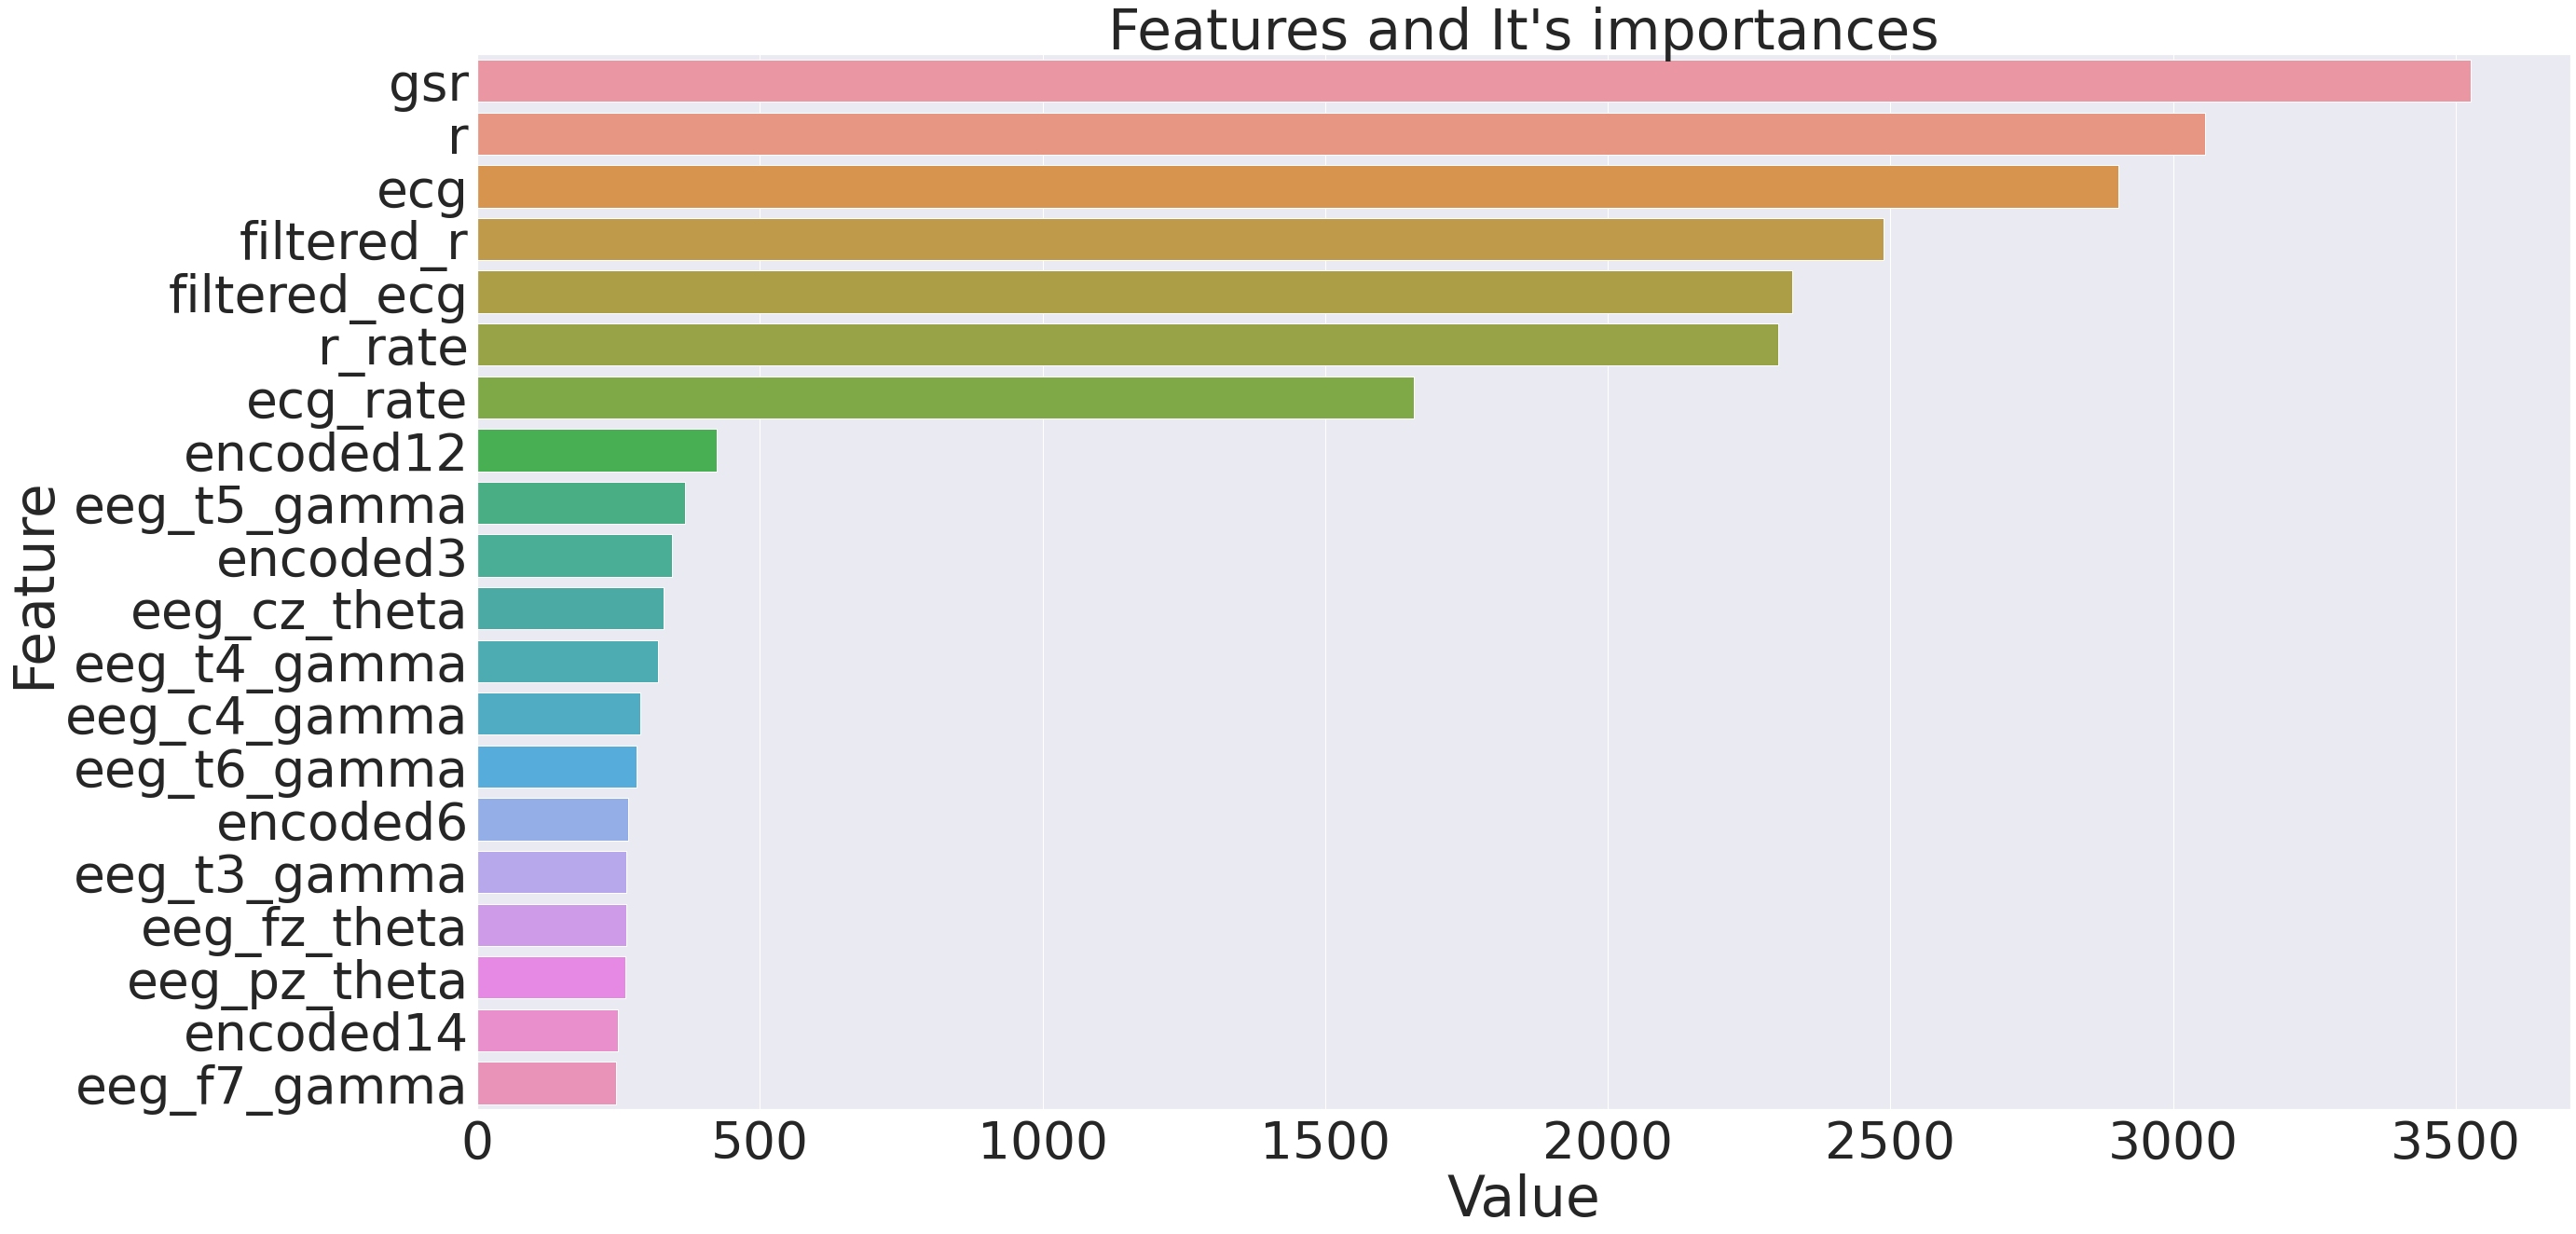

In [41]:
#getting Feature Importance of LightGBM model
# https://stackoverflow.com/questions/53413701/feature-importance-using-lightgbm

#creating a DataFrame of Columns and respective Features scores

features_df = pd.DataFrame({'Feature':X_train_total_features.columns, 'Value' : model.feature_importance()})
features_df.head()

plt.figure(figsize=(40, 20))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=features_df.sort_values(by="Value", ascending=False)[0: 20]) #Let's print Top 20
plt.title("Features and It's importances")
plt.tight_layout()
plt.savefig('lgbm_importances-01.png')
plt.show()

- From Above we can Clearly see that Encoded Features are having More Importance and Certainly Helps in classifying our events 

- Here, we will trained our models with Both Actual Features and Enocoded Features and Record all the Performances, and check
  whether Encoded Features are helping to achieve even more good performance than derived Features.

### Random Model

In [17]:
#This code is taken from microsoft case study

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 4,4 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
   

    labels = [0,1,2,3]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    B =(C/C.sum(axis=0))
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [8]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

In [9]:
# we need to generate 4 numbers and the sum of numbers should be 1
# one solution is to genarate 4 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039


cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,4))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,4)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model", log_loss(y_cv,cv_predicted_y, eps=1e-15))



predicted_y =np.argmax(cv_predicted_y, axis=1)

Log loss on Cross Validation Data using Random Model 1.644916477849896


In [10]:
#Sanity Check
predicted_y[: 10]

array([0, 2, 1, 0, 1, 1, 3, 0, 2, 0])

Number of misclassified points  75.00436575957026
-------------------------------------------------- Confusion matrix --------------------------------------------------


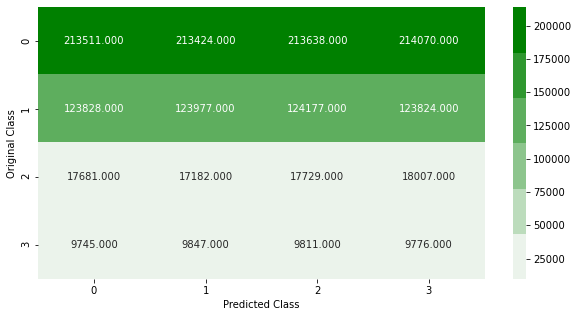

-------------------------------------------------- Precision matrix --------------------------------------------------


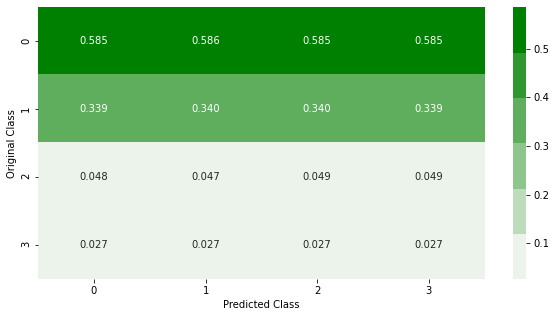

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


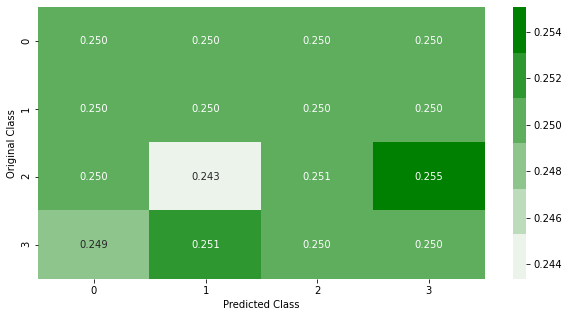

Sum of rows in precision matrix [1. 1. 1. 1.]


In [15]:
plot_confusion_matrix(y_cv, predicted_y)

- Random Model Conclusions: 
    1. here we can See that Random Model Gaves loss of 1.6449 and Keeping this in Mind we should Select the Models that having
      loss still Lot less than This and It shoud Have High Recall rates for Class events

### OverAll Conclusions on EDA, Feature Engineering and Feature Selection

   -  Here, The Probelm Statement:  **Reducing Civil Aviation fatalities** is a very Interesting Problem Statement and We 
     concerned mainly Problem due to Human Errors (Pilot erros) and Helping To solve Through Classical Machine Learning   
     Techniques.
     
    <br>
     
   -  As The Dataset is Large we have Used the Amazing Library **DASK** which helps in Parallezing our task and Using Memory 
        Efficiently. And Also At last I come to know usage of downcast memory for loading Reducing Large Files Efficiently.
     
     <br>
     
   - Then we have downloaded the dataset from Kaggle through Curlwget Extension which is a nice chrome Extension to Download
     the data without actually installing to our Computer.
    
    <br>
    
   - In the Basic EDA Section, we have Seen how each Features are Behaving with target Varibale Event and See it's 
      Distributions Around It. Here the Target Class belongs to 4 Types mainly A = Baseline, B = SS Startle/Surprise, C = CA 
      Channelized Attention, D = DA Diverted Attention and our main task is to find these events using Machine Learning 
      Algorithms and also by adding Required Features.
     
     <br>
     
   - we perform Univariate, Bivariate Analysis to check whether any features alone helping to distingish Class events..
   
   <br>
   
   -  Then we come across Feature Engineering Techniques like adding Filtering signals, Power Features and Potential
      Differences and we perform how the data looks before and after filtering and also relations between class Events.
   
   <br>
   
   -  I come to know about the Nice API which Help me to solve this Case Study is **Biosspy** from Kaggle and also some Nice 
      Blogs in Medium.
    
   <br> 
    
   -  Through T-sne plot I looked how these Potential Difference features relate with Class Events and These some what helped        to distinguish
   
   <br>
   
   - Through Some Research and Knowledge about Decision based Models, I perfrom Decision Based Models to come up with Best
     Features in the Dataset and It's feature Importances among others..
     
     <br>
     
   - After That I Have Used Auto Encoders - A deep Learning technique to Extract Features from Data Itself and Also Trained a 
     Random Model to get the Benchmark Log-loss for our required models.
     
     <br>
     
   -  In the Next Step, we will perform different Machine Learning Models and Select the One Which reduces our Key 
      performance Metric 'Log-Loss'.
      
      <br> 
     
   -  Reference and Blogs I referenced: 
   
        - 1. https://www.kaggle.com/stuartbman/introduction-to-physiological-data
        - 2. https://www.kaggle.com/shahaffind/reducing-commercial-aviation-fatalities-11th
        - 3. https://medium.com/analytics-vidhya/reducing-commercial-aviation-fatalities-ec338e37900c
        